# The goal of this project is to select the best classification algorithm to predict the human wine taste preference based on different wine features

# Data Exploration 
This dataset, "Wine Quality Data Set", is from the UCI Machine Learning Depository. It can be downloaded from ("https://archive.ics.uci.edu/ml/datasets/Wine+Quality")

There are two sets of data in this data set: White wine and red wine.
The white wine data has 4898 instances and the red wine has 1599. 
Both data has 11 independent variables. 

In [1]:
import seaborn as sb
from ggplot import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('/home/xyou2/Team7FinalProject/white.csv')
df.head()

fixed.acidity  volatile.acidity  citric.acid  residual.sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free.sulfur.dioxide  total.sulfur.dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  Color  
0      8.8        6  white  
1      9.5        6  white  
2     10.1        6  white  
3      9.9        6  white  
4      9.9        6  white

In [3]:
df.groupby(["quality"]).count()

fixed.acidity  volatile.acidity  citric.acid  residual.sugar  \
quality                                                                 
3                   20                20           20              20   
4                  163               163          163             163   
5                 1457              1457         1457            1457   
6                 2198              2198         2198            2198   
7                  880               880          880             880   
8                  175               175          175             175   
9                    5                 5            5               5   

         chlorides  free.sulfur.dioxide  total.sulfur.dioxide  density    pH  \
quality                                                                        
3               20                   20                    20       20    20   
4              163                  163                   163      163   163   
5             1457                 1457                  1457     1457  1457   
6             2198                 2198                  2198     2198  2198   
7              880                  880                   880      880   880   
8              175                  175                   175      175   175   
9                5                    5                     5        5     5   

         sulphates  alcohol  Color  
quality                             
3               20       20     20  
4              163      163    163  
5             1457     1457   1457  
6             2198     2198   2198  
7              880      880    880  
8              175      175    175  
9                5        5      5

In [4]:
dg=pd.read_csv('/home/xyou2/Team7FinalProject/red.csv')

## Looking for outliers

The violin plot for white wine: 

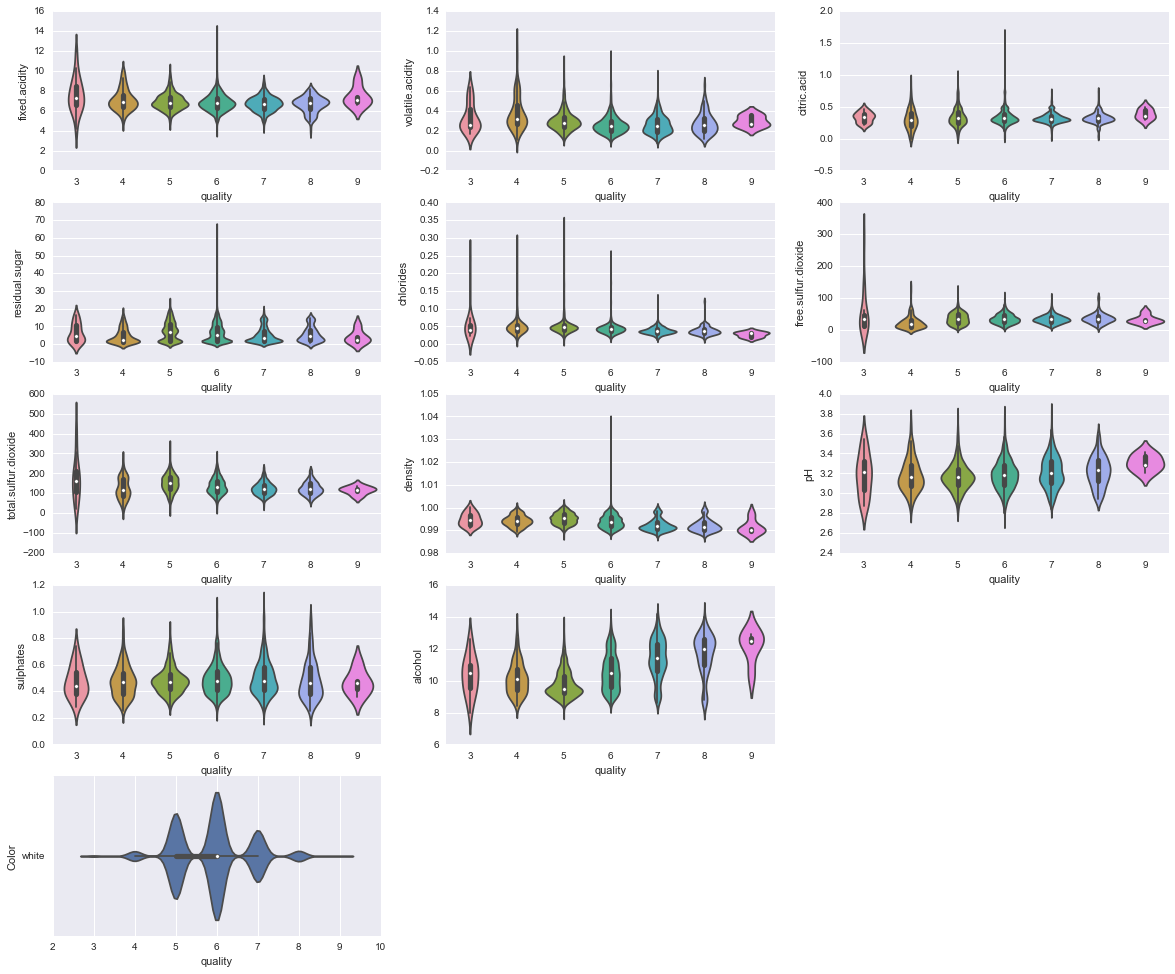

In [8]:
%matplotlib inline
plt.figure(figsize=(20,20))
for column_index, column in enumerate(df.columns):
    if column == 'quality':
        continue
    plt.subplot(6,3,column_index + 1)
    sb.violinplot(x='quality',y=column, data=df)
plt.show()

The violin plot for red wine:

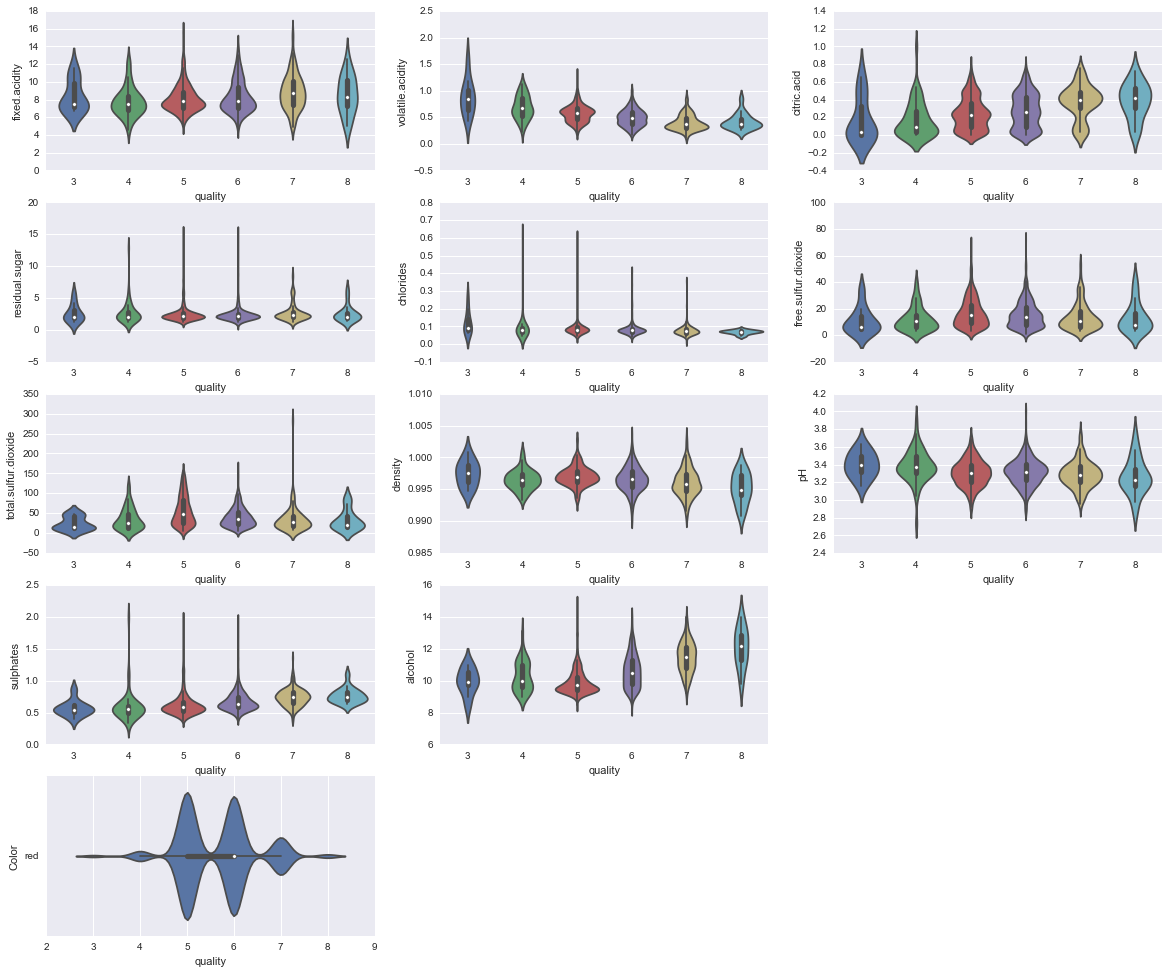

In [9]:
%matplotlib inline
plt.figure(figsize=(20,20))
for column_index, column in enumerate(dg.columns):
    if column == 'quality':
        continue
    plt.subplot(6,3,column_index + 1)
    sb.violinplot(x='quality',y=column, data=dg)
plt.show()

We believe that there are some outliers, and we delete them.
The white wine data has 3994 instances and 
the red wine has 1190.

In [11]:
df1=pd.read_csv('/home/xyou2/Team7FinalProject/WhiteDelete.csv')

In [13]:
dg1=pd.read_csv('/home/xyou2/Team7FinalProject/RedDelete.csv')

In [14]:
dh1=pd.read_csv('/home/xyou2/Team7FinalProject/Winedelete.csv')

The violin plot for white wine after deleting some instances

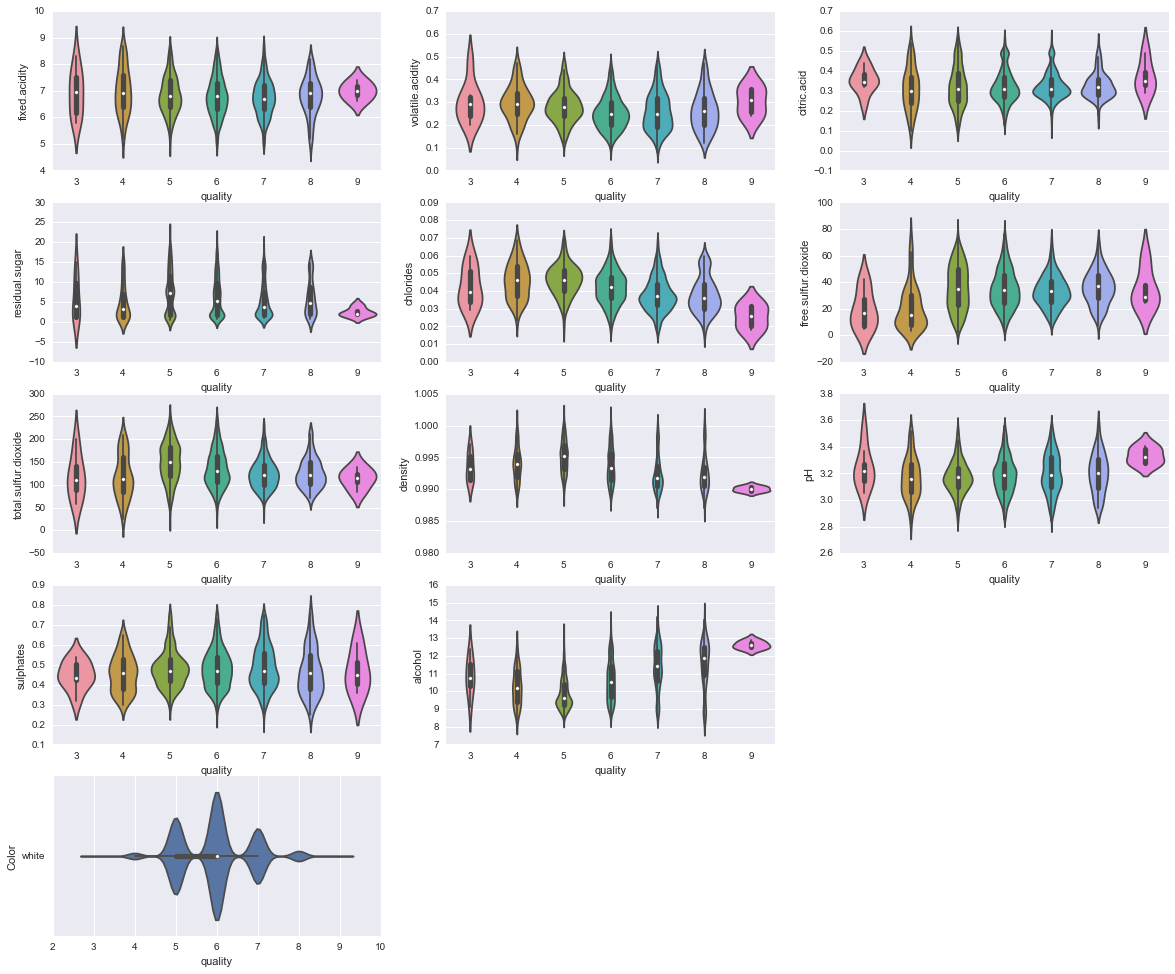

In [12]:
%matplotlib inline
plt.figure(figsize=(20,20))
for column_index, column in enumerate(dg.columns):
    if column == 'quality':
        continue
    plt.subplot(6,3,column_index + 1)
    sb.violinplot(x='quality',y=column, data=df1)
plt.show()

The violin plot for red wine after deleting some instances

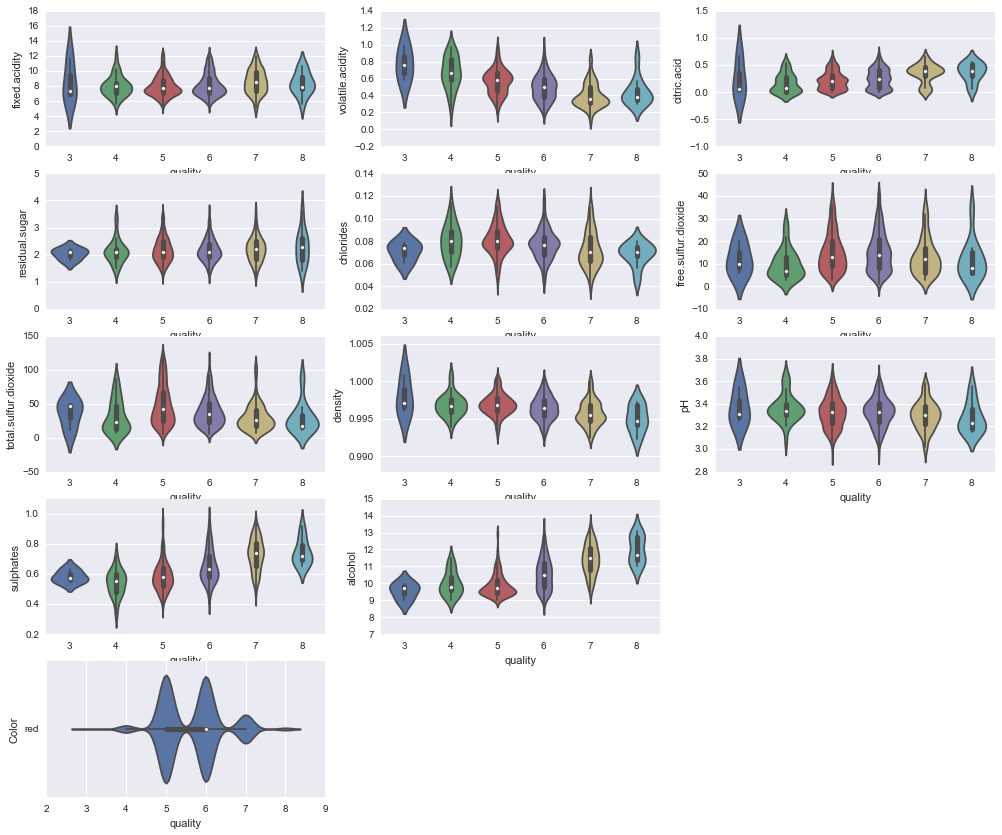

In [15]:
plt.figure(figsize=(17,17))
for column_index, column in enumerate(dg.columns):
    if column == 'quality':
        continue
    plt.subplot(6,3,column_index + 1)
    sb.violinplot(x='quality',y=column, data=dg1)
plt.show()

In [14]:
features = ["fixed.acidity", "volatile.acidity", "citric.acid", "residual.sugar", "chlorides", "free.sulfur.dioxide", "total.sulfur.dioxide", "density" ,"pH", "sulphates", "alcohol", "Color"]
num_features = ["fixed.acidity", "volatile.acidity", "citric.acid", "residual.sugar", "chlorides", "free.sulfur.dioxide", "total.sulfur.dioxide", "density" ,"pH", "sulphates", "alcohol"]


In [15]:
x = df1[features]  ## select features
y = df1["quality"]  ## our target is quality
x1 = dg1[features]
y1 = dg1["quality"]
x2 = dh1[features]
y2 = dh1["quality"]

## Quality Distribution

The bar chart shows the number of wine in each quality level. The blue bar indicates the number of instance for white wine, while the red bar indicates the number of instance for red wine. It shows that the red wine has the most number of instance on the quality level 6, and white wine has the most on the quality level 6.

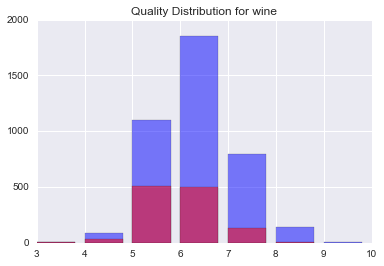

In [18]:
plt.figure(1)  
plt.bar(set(y), df1.groupby(["quality"]).count().iloc[:,0], label = "Quality Distribution", alpha=0.5, color = "b")

plt.bar(set(y1), dg1.groupby(["quality"]).count().iloc[:,0], label = "Quality Distribution", alpha=0.5, color = "r")
plt.title("Quality Distribution for wine")
None

## The mean of numerical features in different quality level

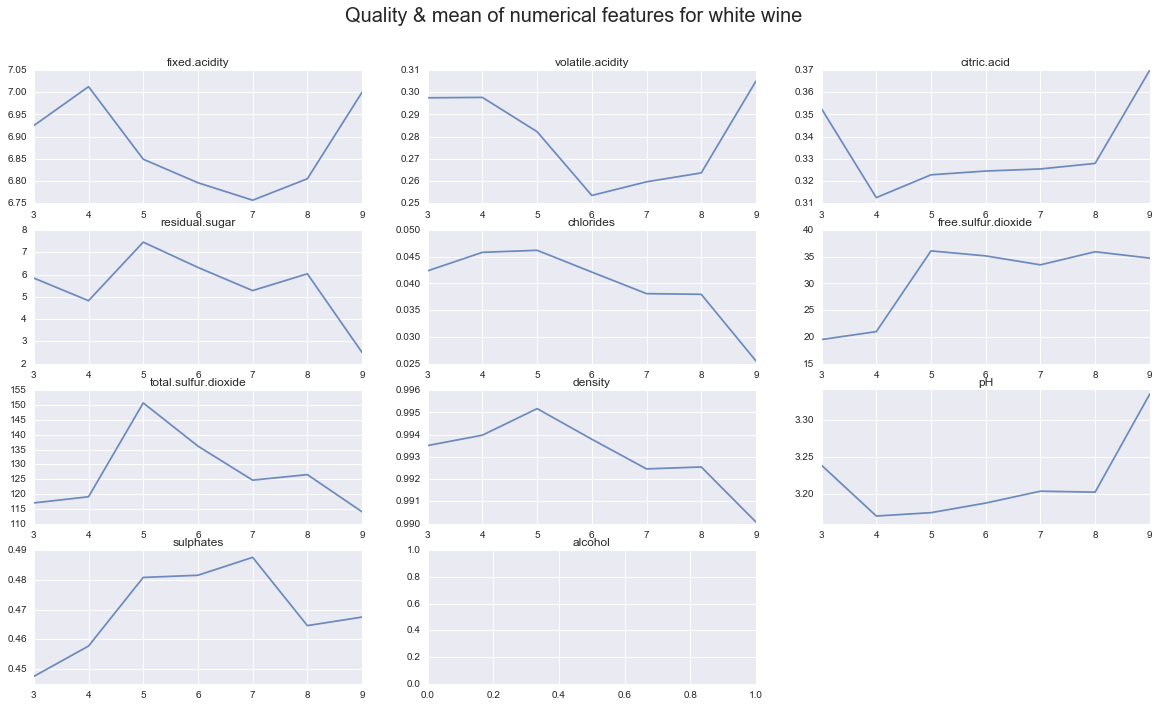

In [17]:
%matplotlib inline
fig = plt.figure(figsize=(20,11))
for i in range(len(num_features)):
    plt.plot(df1.groupby(["quality"]).mean().index, df1.groupby(["quality"]).mean().iloc[:,i-1], label=(num_features[i-1]), alpha=0.8)
    plt.subplot(4, 3, i+1)
    plt.title(num_features[i])
plt.suptitle('Quality & mean of numerical features for white wine', fontsize=20)
None

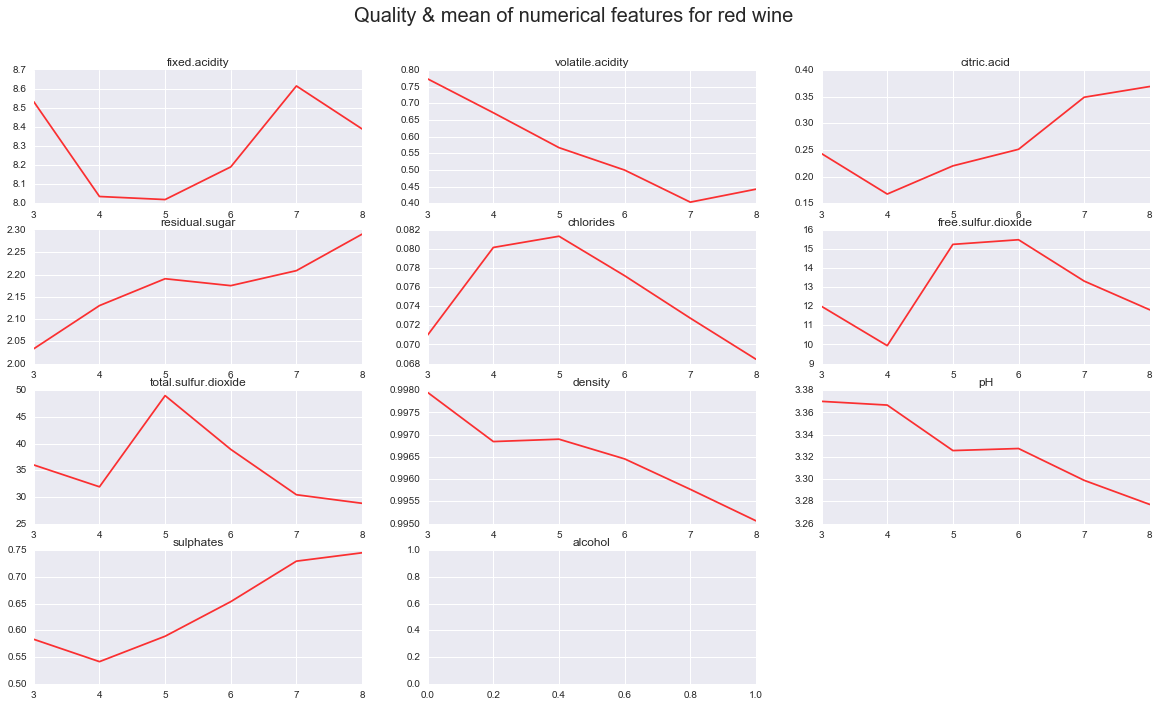

In [19]:
%matplotlib inline
fig = plt.figure(figsize=(20,11))
for i in range(len(num_features)):
    plt.plot(dg1.groupby(["quality"]).mean().index, dg1.groupby(["quality"]).mean().iloc[:,i-1], label=(num_features[i-1]), color = "r", alpha=0.8)
    plt.subplot(4, 3, i+1)
    plt.title(num_features[i])
plt.suptitle('Quality & mean of numerical features for red wine', fontsize=20)
None

## Relationship between quality and different features by gourp

The function ggplot is used to create the desity plot. The following graphs shows that there are some differences between white and red wine based on the 11 features. 

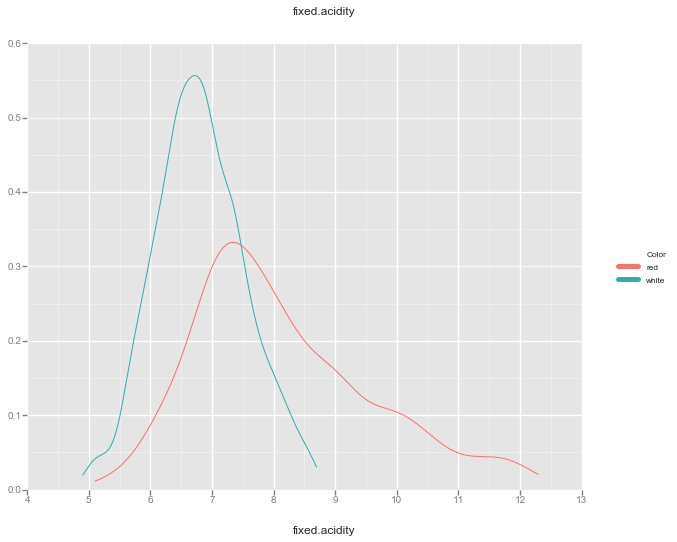

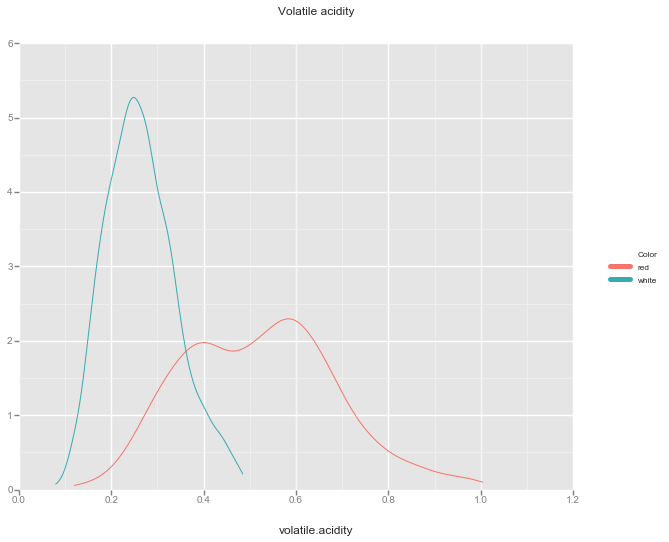

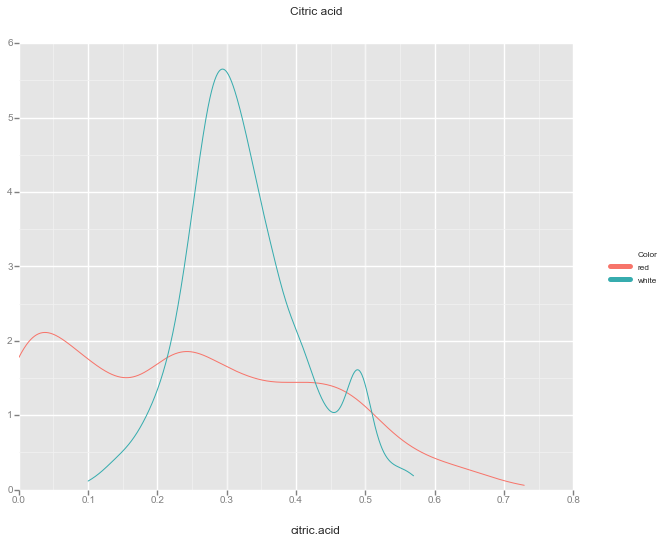

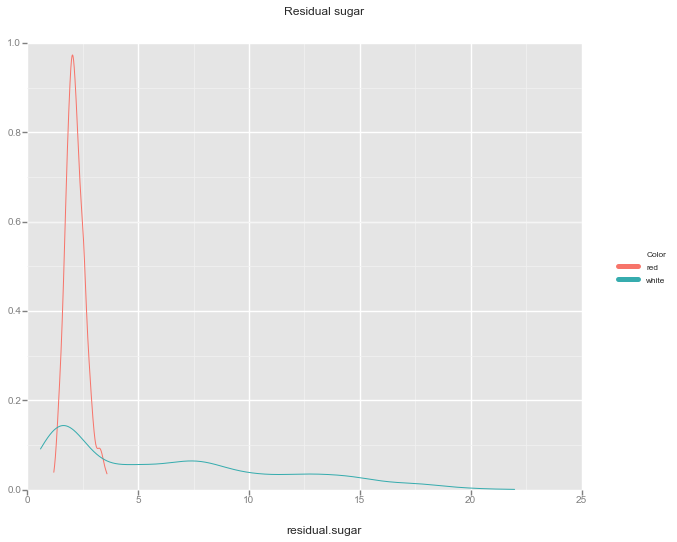

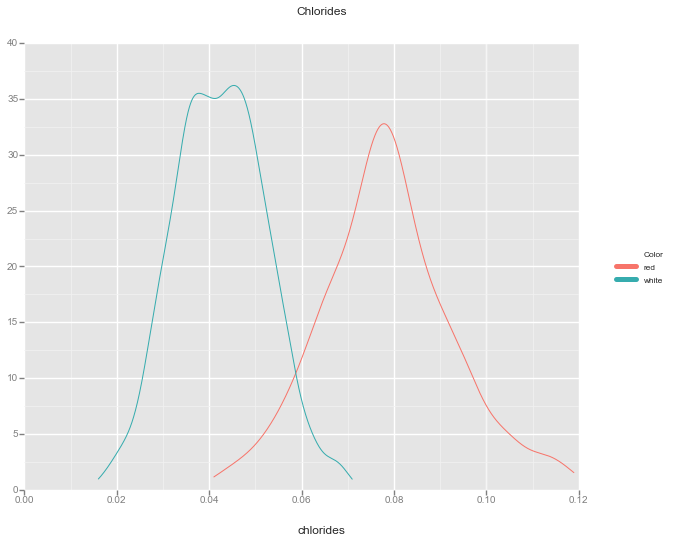

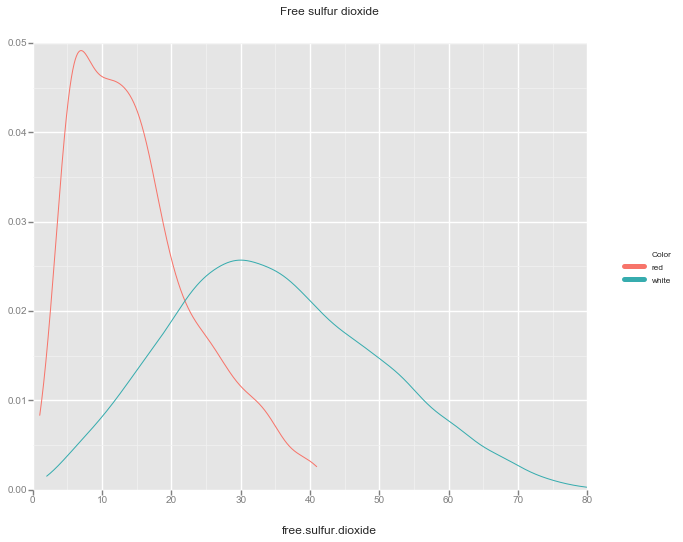

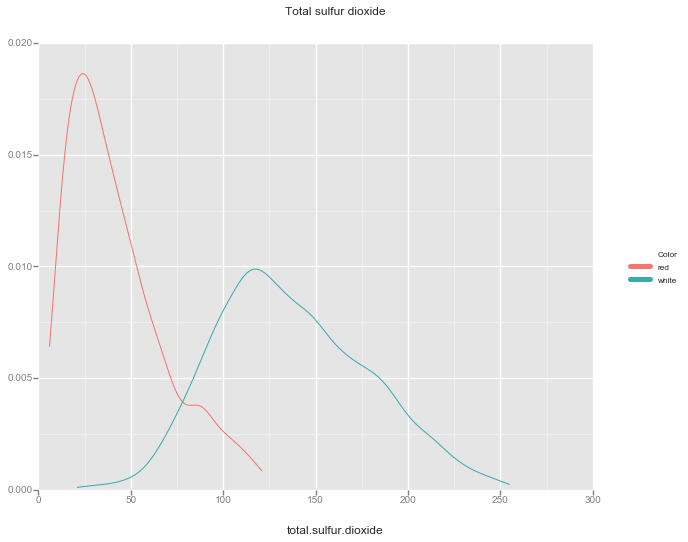

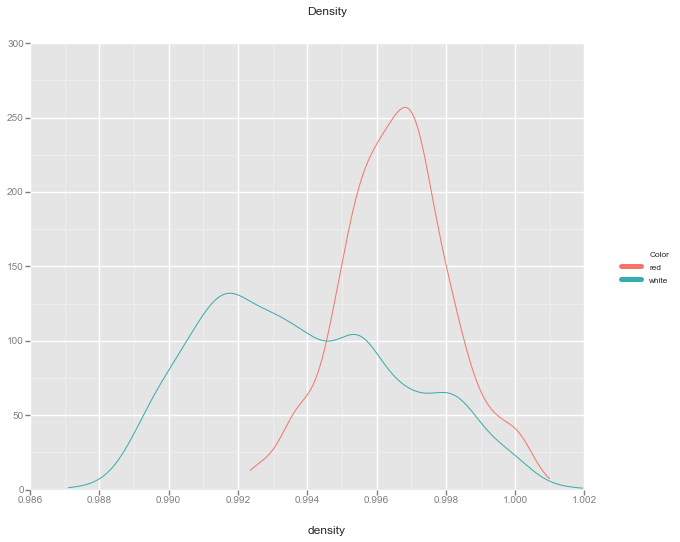

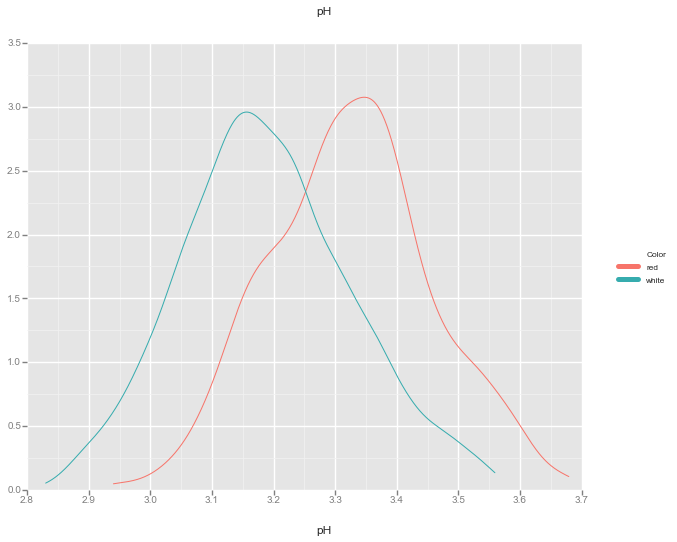

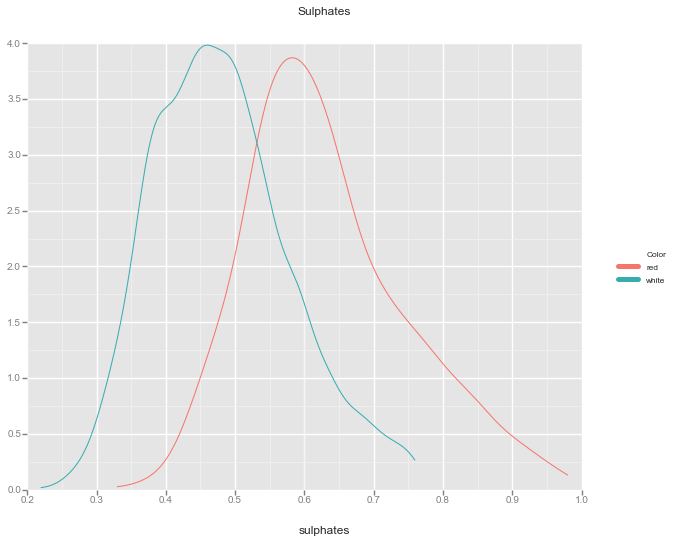

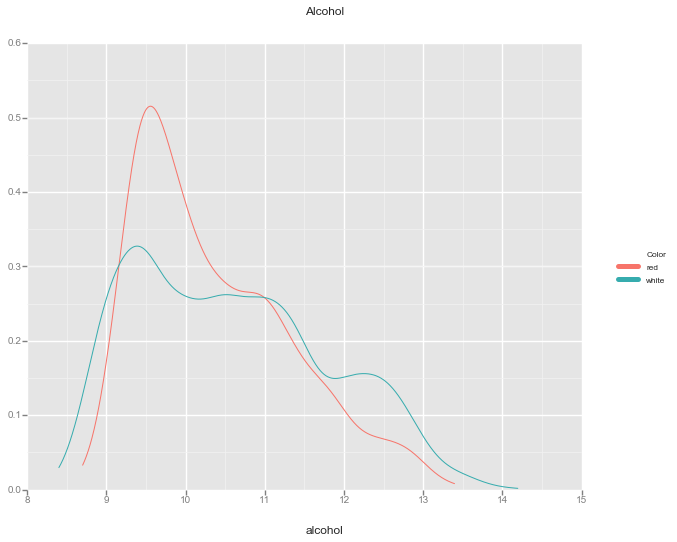

(<ggplot: (340001505)>, <ggplot: (340001481)>, <ggplot: (340001533)>, <ggplot: (339998777)>, <ggplot: (339998809)>, <ggplot: (330085233)>, <ggplot: (340001497)>, <ggplot: (332788165)>, <ggplot: (339998865)>, <ggplot: (339998845)>, <ggplot: (339998909)>)


In [54]:
a = ggplot(dh1, aes(x = "fixed.acidity", color = "Color")) + geom_density() + ggtitle("fixed.acidity")
b = ggplot(dh1, aes(x = "volatile.acidity", color = "Color")) + geom_density() + ggtitle("Volatile acidity")
c = ggplot(dh1, aes(x = "citric.acid", color = "Color")) + geom_density() + ggtitle("Citric acid")
d = ggplot(dh1, aes(x = "residual.sugar", color = "Color")) + geom_density() + ggtitle("Residual sugar")
e = ggplot(dh1, aes(x = "chlorides", color = "Color")) + geom_density() + ggtitle("Chlorides")
f = ggplot(dh1, aes(x = "free.sulfur.dioxide", color = "Color")) + geom_density() + ggtitle("Free sulfur dioxide") 
g = ggplot(dh1, aes(x = "total.sulfur.dioxide", color = "Color")) + geom_density() + ggtitle("Total sulfur dioxide") 
h = ggplot(dh1, aes(x = "density", color = "Color")) + geom_density() + ggtitle("Density") 
i = ggplot(dh1, aes(x = "pH", color = "Color")) + geom_density() + ggtitle("pH") 
j = ggplot(dh1, aes(x = "sulphates", color = "Color")) + geom_density() + ggtitle("Sulphates") 
k = ggplot(dh1, aes(x = "alcohol", color = "Color")) + geom_density()  + ggtitle("Alcohol") 

print (a,b,c,d,e,f,g,h,i,j,k)

The following graphs shows that there are some differences between white and red wine based on the quality. 

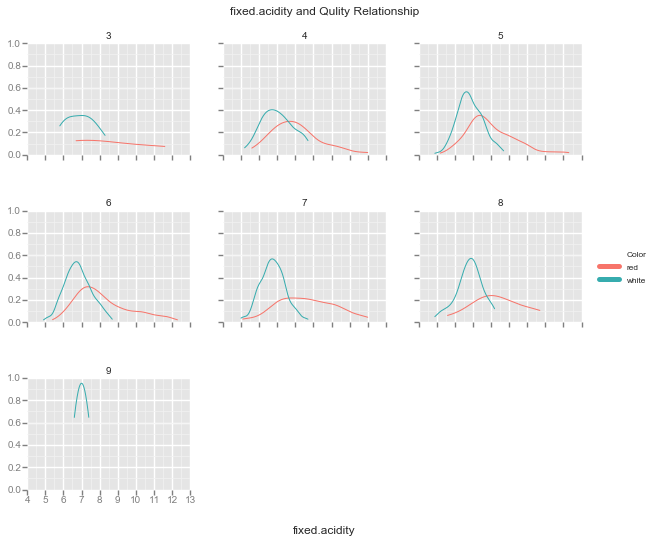

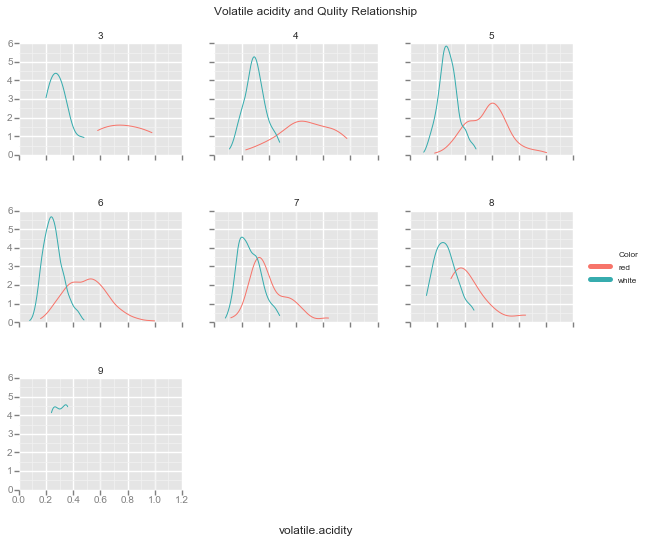

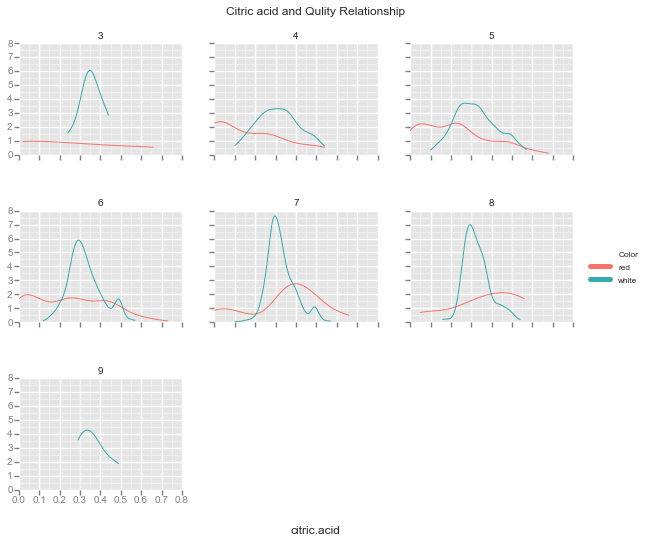

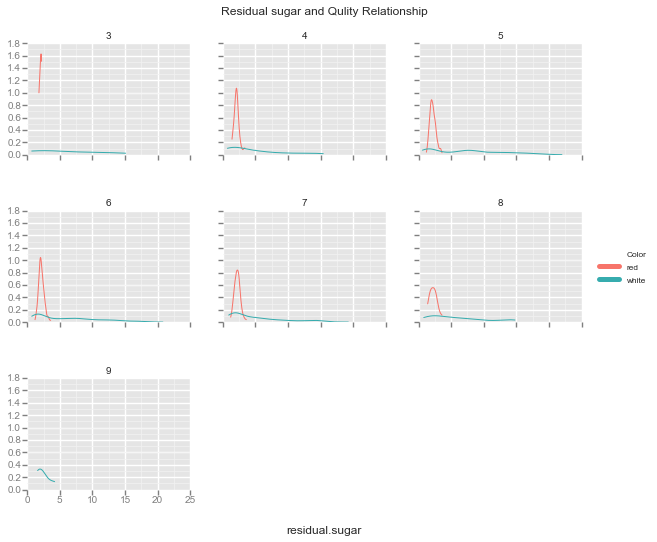

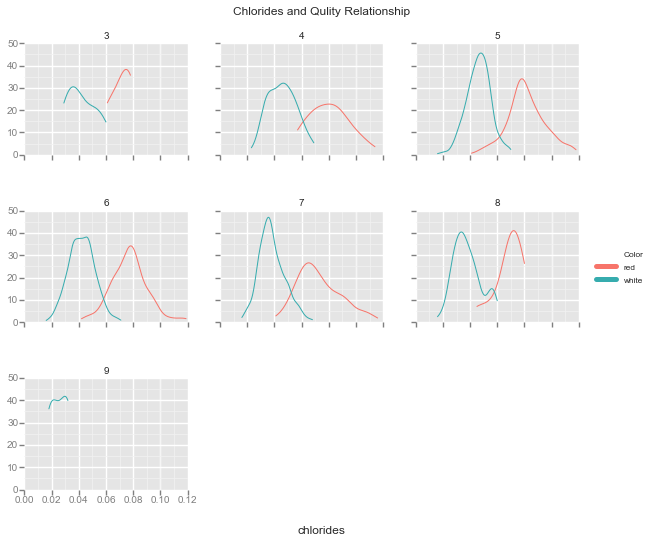

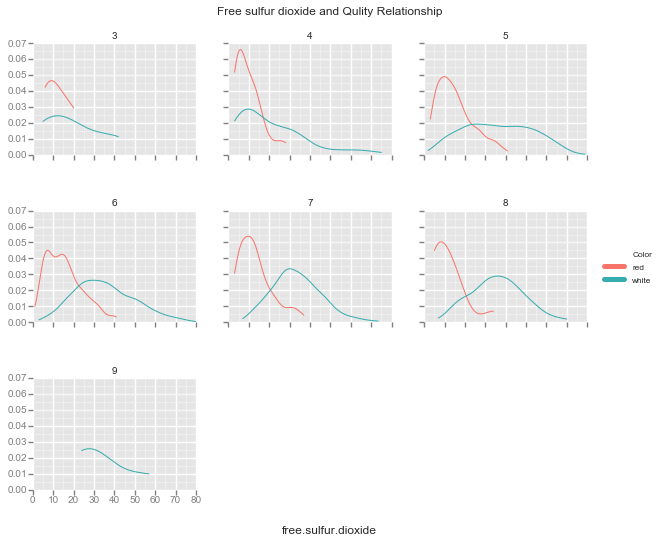

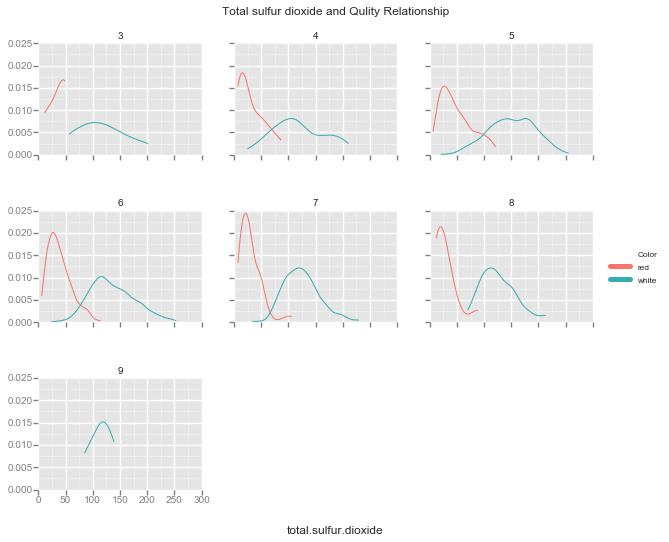

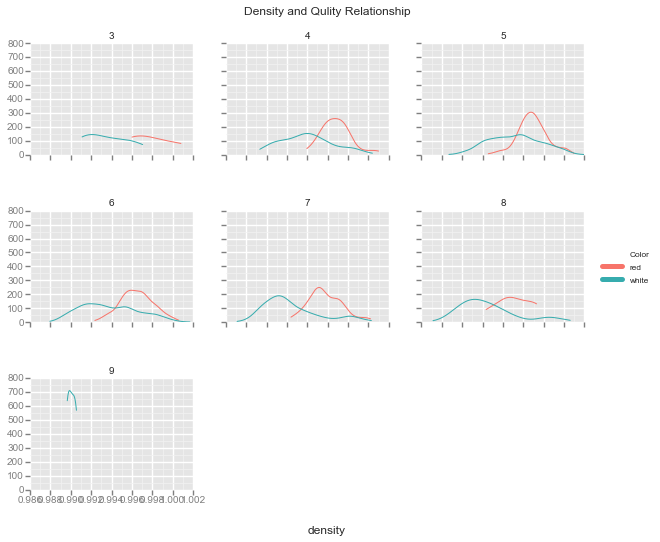

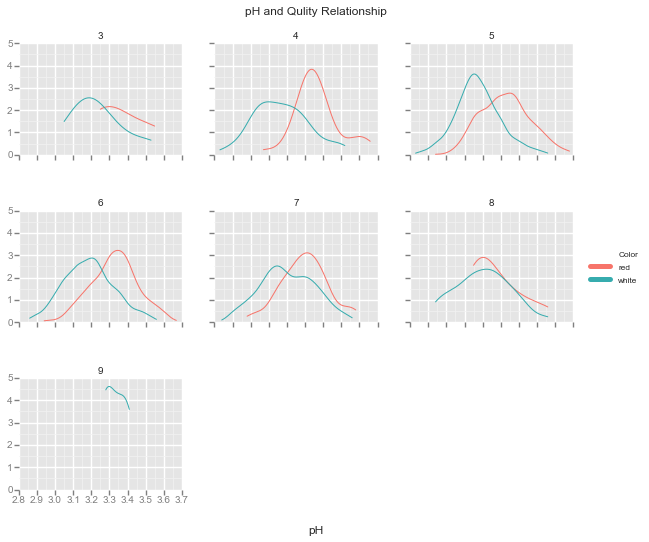

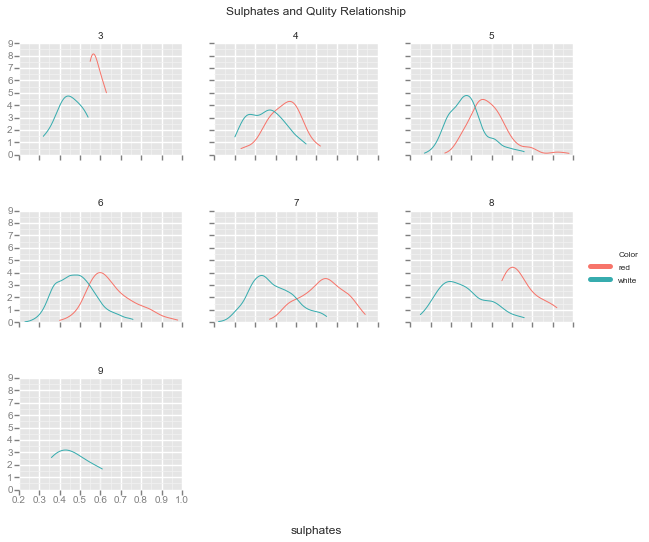

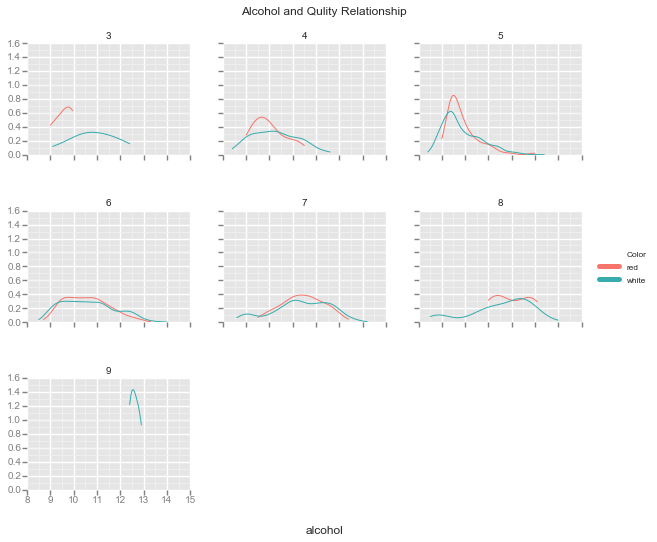

(<ggplot: (302384065)>, <ggplot: (306350329)>, <ggplot: (306359813)>, <ggplot: (306359873)>, <ggplot: (306359913)>, <ggplot: (306359953)>, <ggplot: (306359993)>, <ggplot: (306360033)>, <ggplot: (306353185)>, <ggplot: (306353205)>, <ggplot: (306359889)>)


In [24]:
a = ggplot(dh1, aes("fixed.acidity", color = "Color")) + geom_density() + facet_wrap("quality") + ggtitle('fixed.acidity and Qulity Relationship')
b = ggplot(dh1, aes("volatile.acidity", color = "Color")) + geom_density() + facet_wrap("quality") + ggtitle('Volatile acidity and Qulity Relationship') 
c = ggplot(dh1, aes("citric.acid", color = "Color")) + geom_density() + facet_wrap("quality") + ggtitle('Citric acid and Qulity Relationship')
d = ggplot(dh1, aes("residual.sugar", color = "Color")) + geom_density() + facet_wrap("quality") + ggtitle('Residual sugar and Qulity Relationship') 
e = ggplot(dh1, aes("chlorides", color = "Color")) + geom_density() + facet_wrap("quality") + ggtitle('Chlorides and Qulity Relationship') 
f = ggplot(dh1, aes("free.sulfur.dioxide", color = "Color")) + geom_density() + facet_wrap("quality") + ggtitle('Free sulfur dioxide and Qulity Relationship') 
g = ggplot(dh1, aes("total.sulfur.dioxide", color = "Color")) + geom_density() + facet_wrap("quality") + ggtitle('Total sulfur dioxide and Qulity Relationship') 
h = ggplot(dh1, aes("density", color = "Color")) + geom_density() + facet_wrap("quality") + ggtitle('Density and Qulity Relationship') 
i = ggplot(dh1, aes("pH", color = "Color")) + geom_density() + facet_wrap("quality") + ggtitle('pH and Qulity Relationship') 
j = ggplot(dh1, aes("sulphates", color = "Color")) + geom_density() + facet_wrap("quality") + ggtitle('Sulphates and Qulity Relationship') 
k = ggplot(dh1, aes("alcohol", color = "Color")) + geom_density() + facet_wrap("quality") + ggtitle('Alcohol and Qulity Relationship') 

print (a,b,c,d,e,f,g,h,i,j,k)

From the above graphs, they shows that there is a significant different between white and red wine. For this project, only white wine data is presented.

## Correlation for the features

Pairplot for white wine:

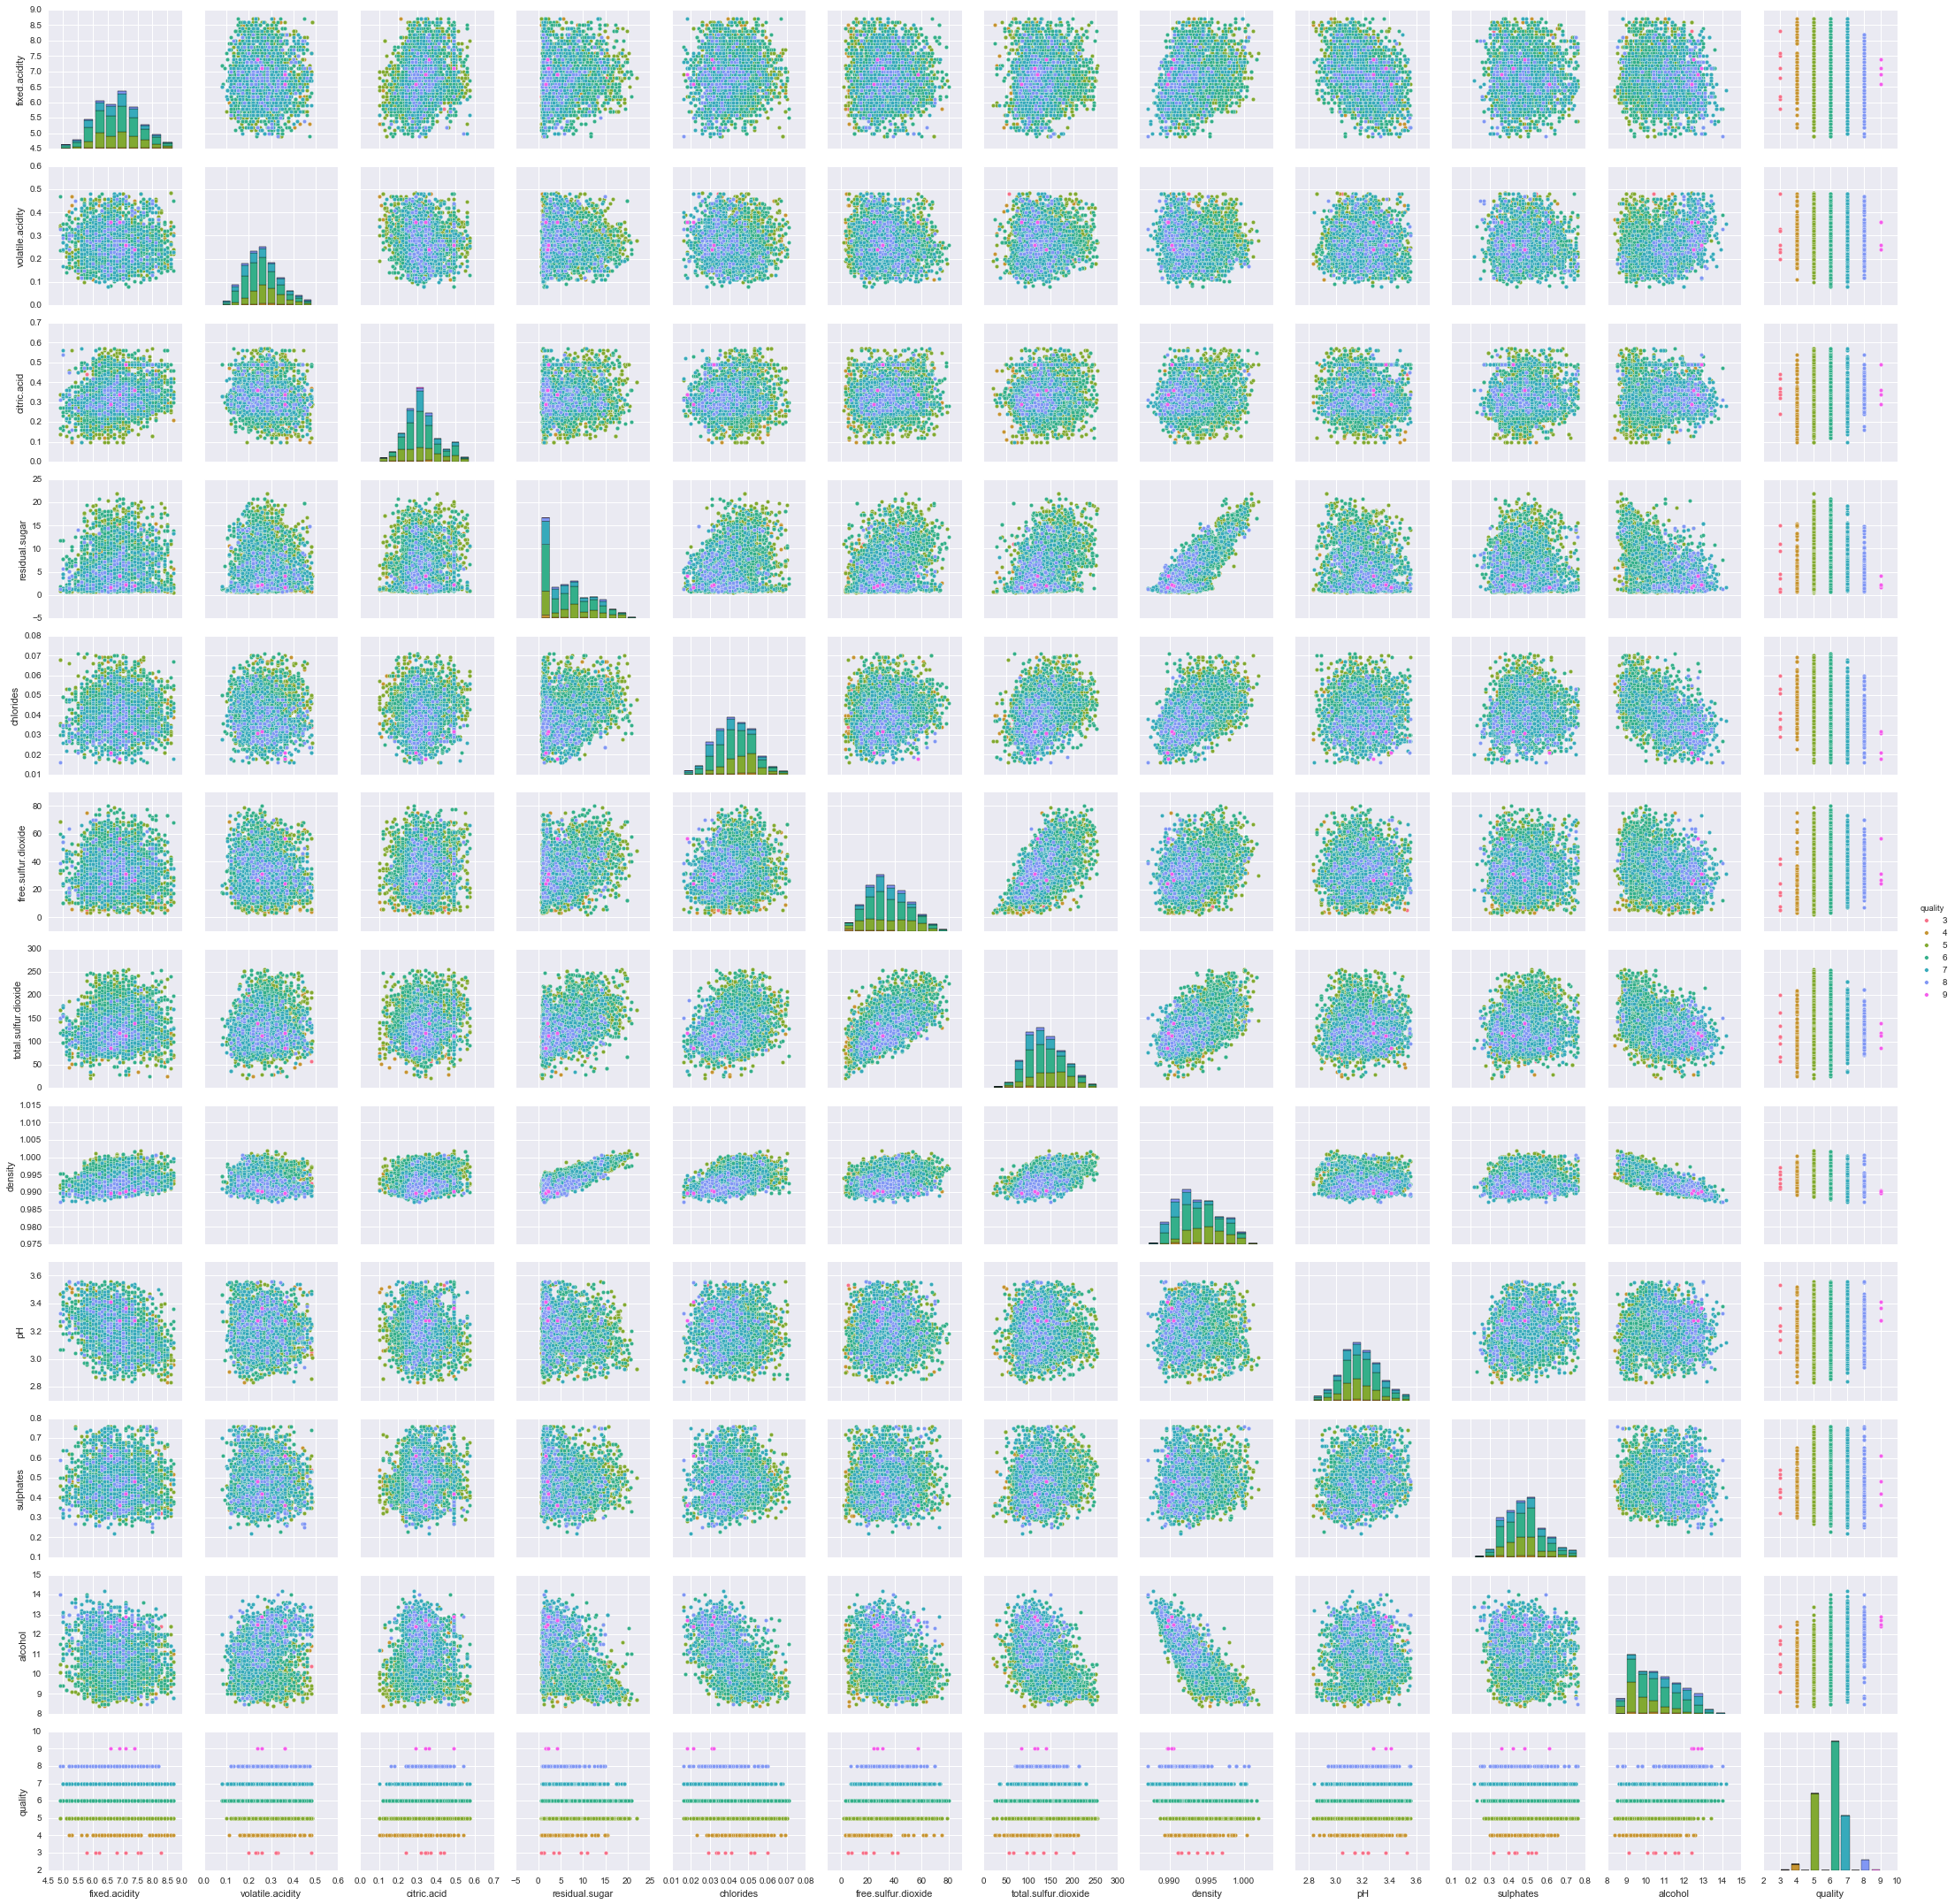

In [57]:
%matplotlib inline
sb.pairplot(df1, hue='quality')

Correlation matrix for white wine

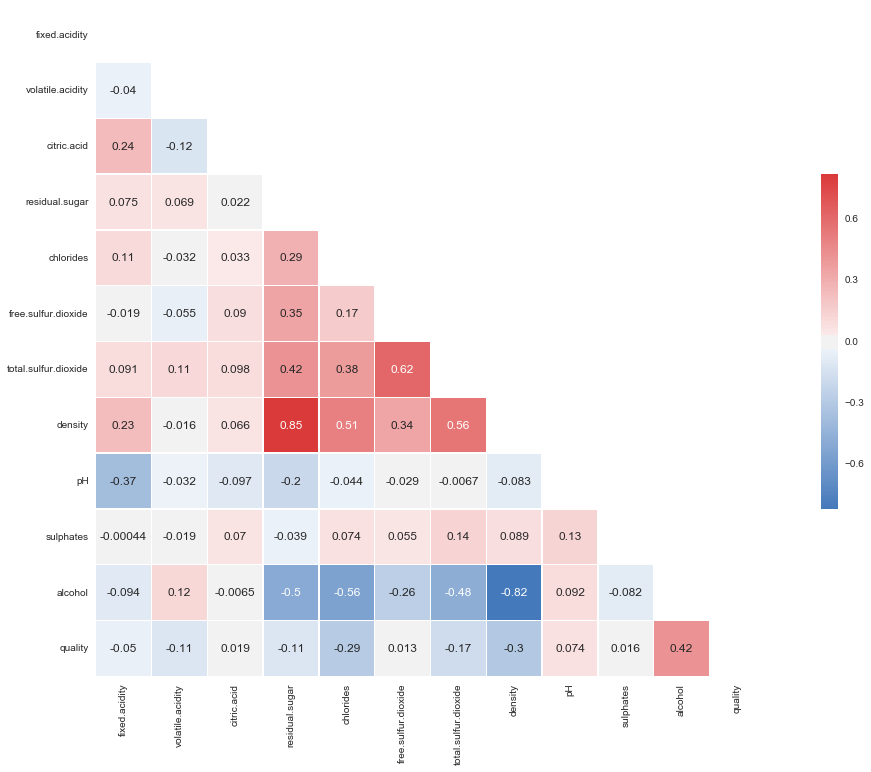

In [65]:
sb.set(style="white")
# Compute the correlation matrix
corr = df1.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 12))

# Generate a custom diverging colormap
cmap = sb.diverging_palette(250, 12, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sb.heatmap(corr, annot = True, mask=mask, cmap=cmap, vmax=.5,
            square=True, xticklabels=corr.columns.values, yticklabels=corr.columns.values,
            linewidths=0.5, cbar_kws={"shrink": 0.5}, ax=ax)


# Linear Regression

In [1]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('/home/xyou2/Team7FinalProject/WhiteDelete.csv')
df1 = df.rename(columns={'fixed.acidity':'fixed_acidity', 'volatile.acidity':'volatile_acidity', 'citric.acid':'citric_acid', 'residual.sugar':'residual_sugar','free.sulfur.dioxide':'free_sulfur_dioxide', 'total.sulfur.dioxide':'total_sulfur_dioxide'})
df1 = df1.drop('Color', 1)

## Fit linear regression with all features

In [3]:
fit = ols("quality ~ fixed_acidity + volatile_acidity + citric_acid + residual_sugar + chlorides + free_sulfur_dioxide + total_sulfur_dioxide + density + pH + sulphates + alcohol", df1).fit()

In [4]:
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.249
Method:                 Least Squares   F-statistic:                     121.6
Date:                Tue, 29 Nov 2016   Prob (F-statistic):          8.93e-241
Time:                        22:25:59   Log-Likelihood:                -4464.8
No. Observations:                3994   AIC:                             8954.
Df Residuals:                    3982   BIC:                             9029.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
Intercept              195.7607 

## Drop unsignificant features

In [5]:
fit1 = ols("quality ~ fixed_acidity + volatile_acidity + residual_sugar + chlorides + free_sulfur_dioxide + density + pH + sulphates + alcohol", df1).fit()

In [6]:
print(fit1.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.250
Method:                 Least Squares   F-statistic:                     148.7
Date:                Tue, 29 Nov 2016   Prob (F-statistic):          6.24e-243
Time:                        22:25:59   Log-Likelihood:                -4464.9
No. Observations:                3994   AIC:                             8950.
Df Residuals:                    3984   BIC:                             9013.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
Intercept             193.7105    

- The model is significant (see from F-statistics and P-value). 
- All features are now significant (see from P-value).
- Omnibus and Jauque-Bera both checking for skewness and kurtosis. Results indicating not normal.
- Durbin-Watson checks auto correlation. (Here not need to worry about auto correlation)
- Cond. No.: suggests multicollinearity

## Diagnostic checks

### Residual Q-Q plot

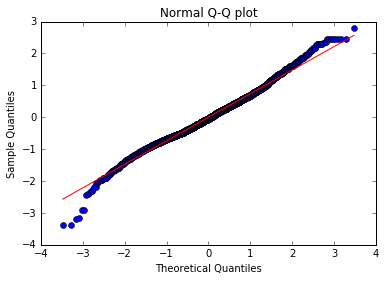

In [7]:
%matplotlib inline
import scipy.stats as stats
res = fit1.resid
fig = sm.qqplot(res, line = 'r')
plt.title("Normal Q-Q plot")
None
plt.show()

- Quantile-Quantile plot: plots the sample quantiles against the theoretical quantiles. 
- If residuals follow normal distribution, should be a 45 degree line against the theoretical quantiles. Clearly from the plot at both ends it deviates quite a lot from the normal quantiles. Therefore the normal assumption is violated.

### Residuals VS Fitted Values Plot

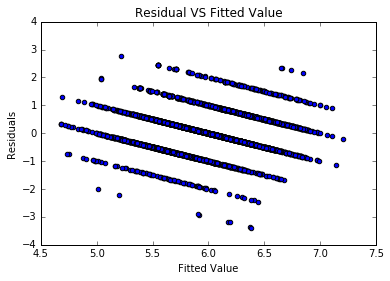

In [8]:
%matplotlib inline
res = fit1.resid
yhat = fit1.predict(df1)
plt.scatter(yhat, res)
plt.ylabel('Residuals')
plt.xlabel('Fitted Value')
plt.title('Residual VS Fitted Value')
None
plt.show()

- We're expecting the residuals to be distributed randomly, i.e, without any patterns, constant variance
- Clearly this plot shows a very strong pattern of residuals versus fitted values, perhaps because the target values are categorical while the fitted values are continous

## Conclusion
- Linear regression is not a good fit for the wine data.

# SVM

In [3]:
df = pd.read_csv('/home/xyou2/Team7FinalProject/WhiteDelete.csv')
df = df.iloc[:,1:len(df)]
X=df.iloc[:,0:11].values
#X=df.iloc[:,0:11]
X
y=df.iloc[:,11].astype('category')
#y=df.iloc[:,11].values

In [23]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

## Doing SVM directly on training set

In [24]:
#Fiting SVM to the training set
#RBF: Radial basis function
from sklearn.svm import SVC
classifier = SVC(kernel ='rbf', random_state=10)
classifier.fit(X_train, y_train)
score_train = classifier.score(X_train, y_train)
score_test = classifier.score(X_test, y_test)
print('Ratio of correctly classified samples for:\n\tTraining-set:\t%f\n\tTest-set:\t%f'%(score_train, score_test))

Ratio of correctly classified samples for:
	Training-set:	0.846411
	Test-set:	0.561327


### Accuracy: 0.561327

## Doing SVM on standardized training set

In [10]:
## Standadize to standadized normal
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)
## Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

#X_train = StandardScaler().fit_transform(X_train)
#X_test = StandardScaler().transform(X_test)

In [11]:
#Fiting SVM to the training set
#RBF: Radial basis function
from sklearn.svm import SVC
classifier = SVC(kernel ='rbf', random_state=10)
classifier.fit(X_train, y_train)
score_train = classifier.score(X_train, y_train)
score_test = classifier.score(X_test, y_test)
print('Ratio of correctly classified samples for:\n\tTraining-set:\t%f\n\tTest-set:\t%f'%(score_train, score_test))


Ratio of correctly classified samples for:
	Training-set:	0.631052
	Test-set:	0.566959


### Accuracy: 0.566959

### Result is better after scaling

## Try different kernels

In [40]:
#Fiting SVM to the training set
from sklearn.svm import SVC
classifier = SVC(kernel ='linear', random_state=10)
classifier.fit(X_train, y_train)
score_train = classifier.score(X_train, y_train)
score_test = classifier.score(X_test, y_test)
print('Ratio of correctly classified samples for:\n\tTraining-set:\t%f\n\tTest-set:\t%f'%(score_train, score_test))

Ratio of correctly classified samples for:
	Training-set:	0.518781
	Test-set:	0.528786


In [41]:
#Fiting SVM to the training set
from sklearn.svm import SVC
classifier = SVC(kernel ='poly', random_state=10)
classifier.fit(X_train, y_train)
score_train = classifier.score(X_train, y_train)
score_test = classifier.score(X_test, y_test)
print('Ratio of correctly classified samples for:\n\tTraining-set:\t%f\n\tTest-set:\t%f'%(score_train, score_test))

Ratio of correctly classified samples for:
	Training-set:	0.621035
	Test-set:	0.546934


In [42]:
#Fiting SVM to the training set
from sklearn.svm import SVC
classifier = SVC(kernel ='sigmoid', random_state=10)
classifier.fit(X_train, y_train)
score_train = classifier.score(X_train, y_train)
score_test = classifier.score(X_test, y_test)
print('Ratio of correctly classified samples for:\n\tTraining-set:\t%f\n\tTest-set:\t%f'%(score_train, score_test))

Ratio of correctly classified samples for:
	Training-set:	0.429883
	Test-set:	0.439925


### Kernel rbf is the best

## Confusion matrix

In [105]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_pred,y_test)
cm

array([[  0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0],
       [  1,  14, 247, 121,   8,   1,   0],
       [  3,  16, 184, 589, 238,  47,   1],
       [  0,   0,   3,  42,  70,  13,   0],
       [  0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0]])

## Plot Confusion Matrix

In [93]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Confusion matrix for RBF

Confusion matrix, without normalization
[[  0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0]
 [  1  14 247 121   8   1   0]
 [  3  16 184 589 238  47   1]
 [  0   0   3  42  70  13   0]
 [  0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0]]


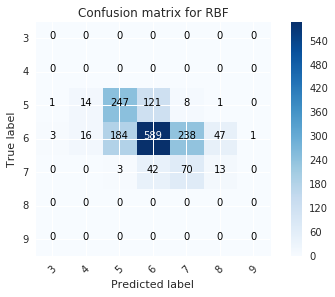

In [111]:
plt.figure()
plot_confusion_matrix(cm, classes=set(df['quality']), title='Confusion matrix for RBF')

## Confusion matrix for polynomial kernel

In [112]:
#Fiting SVM to the training set
from sklearn.svm import SVC
classifier = SVC(kernel ='poly', random_state=10)
classifier.fit(X_train, y_train)
score_train = classifier.score(X_train, y_train)
score_test = classifier.score(X_test, y_test)
print('Ratio of correctly classified samples for:\n\tTraining-set:\t%f\n\tTest-set:\t%f'%(score_train, score_test))

Ratio of correctly classified samples for:
	Training-set:	0.621035
	Test-set:	0.546934


In [113]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_pred,y_test)
cm

array([[  0,   0,   1,   1,   0,   0,   0],
       [  0,   1,   4,   2,   0,   0,   0],
       [  1,  10, 185,  79,  10,   1,   0],
       [  3,  19, 241, 620, 239,  44,   1],
       [  0,   0,   3,  50,  67,  14,   0],
       [  0,   0,   0,   0,   0,   1,   0],
       [  0,   0,   0,   0,   0,   1,   0]])

Confusion matrix, without normalization
[[  0   0   1   1   0   0   0]
 [  0   1   4   2   0   0   0]
 [  1  10 185  79  10   1   0]
 [  3  19 241 620 239  44   1]
 [  0   0   3  50  67  14   0]
 [  0   0   0   0   0   1   0]
 [  0   0   0   0   0   1   0]]


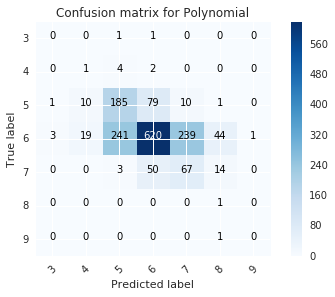

In [114]:
plt.figure()
plot_confusion_matrix(cm, classes=set(df['quality']), title='Confusion matrix for Polynomial')

## ----------------------------------------------------------------------------------

## One way to improve accuracy is to delete quality level 3 and 9

In [152]:
df39 = df.loc[((df['quality'] != 3)&(df['quality'] != 9)),:]
X=df39.iloc[:,0:11].values
y=df39.iloc[:,11].astype('category')
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)
from sklearn.svm import SVC
classifier = SVC(kernel ='rbf', random_state=10)
classifier.fit(X_train, y_train)
score_train = classifier.score(X_train, y_train)
score_test = classifier.score(X_test, y_test)
print('Ratio of correctly classified samples for:\n\tTraining-set:\t%f\n\tTest-set:\t%f'%(score_train, score_test))

Ratio of correctly classified samples for:
	Training-set:	0.636668
	Test-set:	0.570621


### Accuracy:0.570621

In [117]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_pred,y_test)
cm

array([[  0,   0,   0,   0,   0],
       [ 22, 242, 128,  10,   0],
       [ 16, 161, 590, 238,  47],
       [  0,   6,  39,  77,  17],
       [  0,   0,   0,   0,   0]])

Confusion matrix, without normalization
[[  0   0   0   0   0]
 [ 22 242 128  10   0]
 [ 16 161 590 238  47]
 [  0   6  39  77  17]
 [  0   0   0   0   0]]


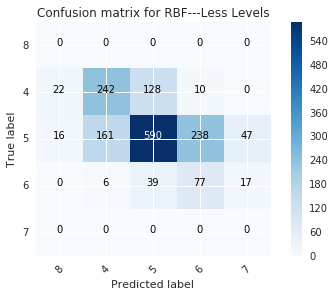

In [119]:
plt.figure()
plot_confusion_matrix(cm, classes=set(df39['quality']), title='Confusion matrix for RBF---Less Levels')

In [120]:
df39 = df.loc[((df['quality'] != 3)&(df['quality'] != 9)),:]
X=df39.iloc[:,0:11].values
y=df39.iloc[:,11].astype('category')
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)
from sklearn.svm import SVC
classifier = SVC(kernel ='poly', random_state=10)
classifier.fit(X_train, y_train)
score_train = classifier.score(X_train, y_train)
score_test = classifier.score(X_test, y_test)
print('Ratio of correctly classified samples for:\n\tTraining-set:\t%f\n\tTest-set:\t%f'%(score_train, score_test))

Ratio of correctly classified samples for:
	Training-set:	0.603600
	Test-set:	0.545512


In [121]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_pred,y_test)
cm

array([[  1,   1,   1,   0,   0],
       [ 18, 178,  90,  12,   1],
       [ 18, 225, 629, 253,  45],
       [  1,   5,  37,  60,  17],
       [  0,   0,   0,   0,   1]])

Confusion matrix, without normalization
[[  1   1   1   0   0]
 [ 18 178  90  12   1]
 [ 18 225 629 253  45]
 [  1   5  37  60  17]
 [  0   0   0   0   1]]


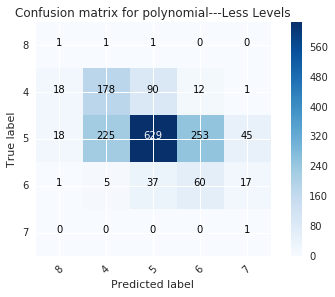

In [122]:
plt.figure()
plot_confusion_matrix(cm, classes=set(df39['quality']), title='Confusion matrix for polynomial---Less Levels')

## ---------------------------------------------------------------------------------------------------------------

In [46]:
print(classification_report(y_pred,y_test))

             precision    recall  f1-score   support

          3       0.00      0.00      0.00         0
          4       0.10      0.18      0.13        17
          5       0.44      0.43      0.44       450
          6       0.57      0.48      0.52       894
          7       0.25      0.35      0.29       228
          8       0.00      0.00      0.00         9
          9       0.00      0.00      0.00         0

avg / total       0.48      0.44      0.46      1598



/usr/lib64/python3.4/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


## Cross Validation

In [4]:
df=pd.read_csv('WhiteDelete.csv')
df = df.iloc[:,1:len(df)]
df39 = df.loc[((df['quality'] != 3)&(df['quality'] != 9)),:]
X=df39.iloc[:,0:11].values
#X=df.iloc[:,0:11]
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)
y=df39.iloc[:,11].values
#y=df.iloc[:,11].values

### 5 folds

In [8]:
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.cross_validation import cross_val_score
classifier = SVC(kernel ='rbf', random_state=10)
acc5 = cross_val_score(classifier, X, y, cv=5)
np.mean(acc5)

0.5218983813133069

### 10 folds

In [10]:
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.cross_validation import cross_val_score
classifier = SVC(kernel ='rbf', random_state=10)
acc10 = cross_val_score(classifier, X, y, cv=10)
np.mean(acc10)


0.53674369362633623

## Boxplot of the result for 5 folds and 10 folds CV

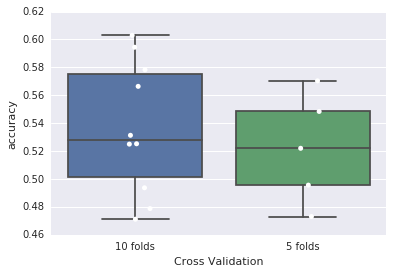

In [14]:
%matplotlib inline
rf_df = pd.DataFrame({'accuracy': acc10,
                       'Cross Validation': ['10 folds'] * 10})
dt_df = pd.DataFrame({'accuracy': acc5,
                      'Cross Validation': ['5 folds'] * 5})
both_df = rf_df.append(dt_df)
sb.boxplot(x='Cross Validation', y='accuracy', data=both_df)
sb.stripplot(x='Cross Validation', y='accuracy', data=both_df, jitter=True, color='white')
None

### 20 folds

In [15]:
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.cross_validation import cross_val_score
classifier = SVC(kernel ='rbf', random_state=10)
acc20 = cross_val_score(classifier, X, y, cv=20)
np.mean(acc20)

0.54492237821846756

### 50 folds

In [16]:
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.cross_validation import cross_val_score
classifier = SVC(kernel ='rbf', random_state=10)
acc50 = cross_val_score(classifier, X, y, cv=50)
np.mean(acc50)

0.55011840348255914

### Accuracy grows when doing more folds

## Boxplot of the result for 20 folds and 50 folds CV

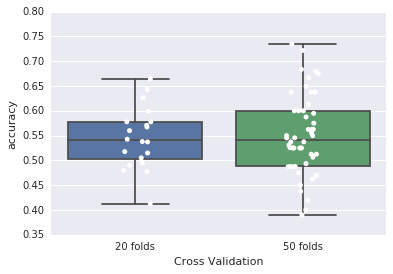

In [17]:
%matplotlib inline
rf_df = pd.DataFrame({'accuracy': acc20,
                       'Cross Validation': ['20 folds'] * 20})
dt_df = pd.DataFrame({'accuracy': acc50,
                      'Cross Validation': ['50 folds'] * 50})
both_df = rf_df.append(dt_df)
sb.boxplot(x='Cross Validation', y='accuracy', data=both_df)
sb.stripplot(x='Cross Validation', y='accuracy', data=both_df, jitter=True, color='white')
None

# KNN

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
df = pd.read_csv('/home/xyou2/Team7FinalProject/WhiteDelete.csv')

In [105]:
df.describe()

Unnamed: 0  fixed.acidity  volatile.acidity  citric.acid  \
count  3994.000000    3994.000000       3994.000000  3994.000000   
mean   2505.973460       6.808851          0.264188     0.324246   
std    1417.695016       0.726035          0.076255     0.086149   
min       0.000000       4.900000          0.080000     0.100000   
25%    1264.250000       6.300000          0.210000     0.270000   
50%    2580.500000       6.800000          0.260000     0.310000   
75%    3738.750000       7.300000          0.310000     0.370000   
max    4897.000000       8.700000          0.485000     0.570000   

       residual.sugar    chlorides  free.sulfur.dioxide  total.sulfur.dioxide  \
count     3994.000000  3994.000000          3994.000000           3994.000000   
mean         6.381272     0.042376            34.780295            137.110165   
std          4.933833     0.009875            15.000780             41.110967   
min          0.600000     0.016000             2.000000             21.000000   
25%          1.800000     0.035000            24.000000            107.000000   
50%          5.200000     0.042000            34.000000            133.000000   
75%          9.700000     0.049000            45.000000            166.000000   
max         22.000000     0.071000            80.000000            255.000000   

           density           pH    sulphates      alcohol      quality  
count  3994.000000  3994.000000  3994.000000  3994.000000  3994.000000  
mean      0.993866     3.187814     0.481372    10.580178     5.948172  
std       0.002888     0.137697     0.098904     1.214028     0.855482  
min       0.987110     2.830000     0.220000     8.400000     3.000000  
25%       0.991600     3.090000     0.410000     9.500000     5.000000  
50%       0.993570     3.180000     0.470000    10.500000     6.000000  
75%       0.995900     3.280000     0.540000    11.400000     6.000000  
max       1.001960     3.560000     0.760000    14.200000     9.000000

## Define Features X and Target y

In [4]:
X=df.iloc[:,0:11].values  #X contain 11 features
y=df.iloc[:,11].astype('category')

## Feature standardization

Reference: http://sebastianraschka.com/Articles/2014_about_feature_scaling.html#about-standardization

Feature standardization(or Z-score normalization)is to rescale features so that they’ll have the properties of a standard normal distribution with μ=0μ=0 and σ=1.
where μμ is the mean (average) and σσ is the standard deviation from the mean; standard scores (also called z scores) of the samples are calculated as follows:

z=(x−μ)/σ

Reference: http://sebastianraschka.com/Articles/2014_about_feature_scaling.html#about-standardization

Standardizing the features so that they are centered around 0 with a standard deviation of 1 is not 
only important if we are comparing measurements that have different units, but it is also a general requirement
for many machine learning algorithms.

In [8]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

## Cross_Validation,split traing set and test set

In [6]:
#Code from website,made some changes###
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

#Method 2, Normalized Features into train and test sets
#X_train = StandardScaler().fit_transform(X_train)
#X_test = StandardScaler().transform(X_test)

## Find the Optim K

Reference: http://www.cs.haifa.ac.il/~rita/ml_course/lectures/KNN.pdf

How to Choose k? In practice: 
1. k should be large so that error rate is minimized, because k too small will lead to noisy decision boundaries
2. k should be small enough so that only nearby samples are included, because k too large will lead to over-smoothed
boundaries

### Compare K by using Manhattan Distance (  sum(|x - y|)   )

In [15]:
#Code from website,made some changes###
from sklearn.neighbors import KNeighborsClassifier
error_rate = []
for i in range(1,40):
    
    classifier = KNeighborsClassifier(n_neighbors=i,metric = 'manhattan', p = 2)
    classifier.fit(X_train,y_train)
    pred_i = classifier.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

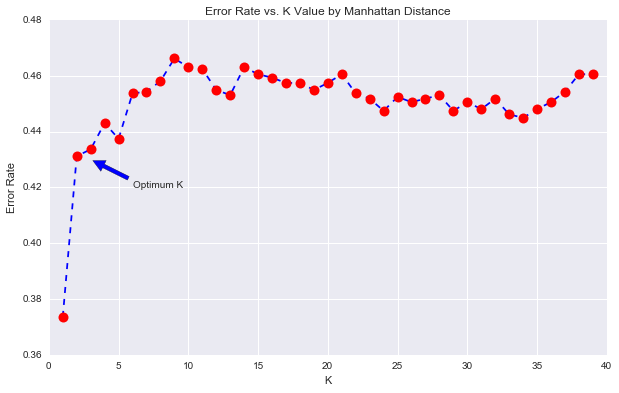

In [16]:
%matplotlib inline
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.annotate('Optimum K', xy=(3, 0.43), xytext=(6, 0.42),
            arrowprops=dict(facecolor='blue', shrink=0.05),
            )
plt.title('Error Rate vs. K Value by Manhattan Distance')
plt.xlabel('K')
plt.ylabel('Error Rate')

### Compare K by using minkowski Distance (Default) sum(|x - y|^p)^(1/p)

In [21]:
error_rate = []
for i in range(1,40):
    
    classifier = KNeighborsClassifier(n_neighbors=i,p=3)
    classifier.fit(X_train,y_train)
    pred_i = classifier.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

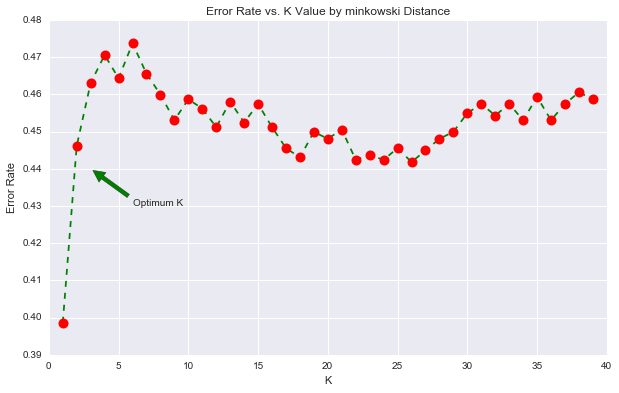

In [22]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='green', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.annotate('Optimum K', xy=(3, 0.44), xytext=(6, 0.43),
            arrowprops=dict(facecolor='green', shrink=0.05),
            )
plt.title('Error Rate vs. K Value by minkowski Distance')
plt.xlabel('K')
plt.ylabel('Error Rate')

### Compare K by using euclidean Distance (  sqrt(sum((x - y)^2)) )

In [19]:
error_rate = []
for i in range(1,40):
    
    classifier = KNeighborsClassifier(n_neighbors=i,metric = 'euclidean', p = 3)
    classifier.fit(X_train,y_train)
    pred_i = classifier.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

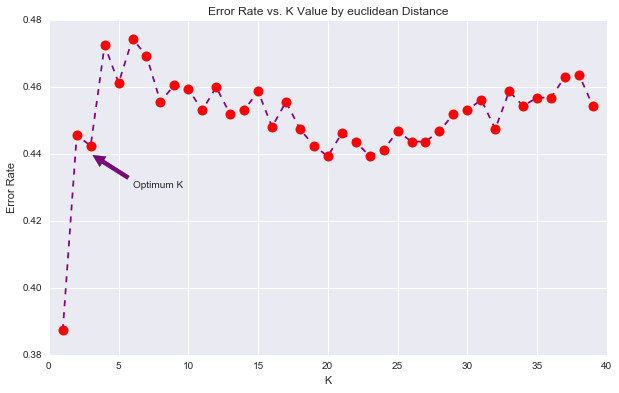

In [20]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='purple', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.annotate('Optimum K', xy=(3, 0.44), xytext=(6, 0.43),
            arrowprops=dict(facecolor='purple', shrink=0.05),
            )
plt.title('Error Rate vs. K Value by euclidean Distance')
plt.xlabel('K')
plt.ylabel('Error Rate')

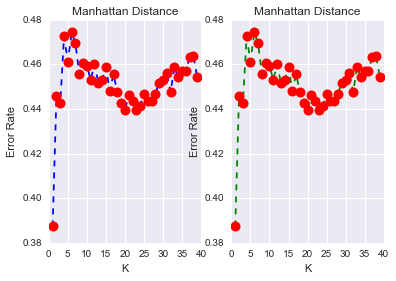

In [124]:
fig, axes = plt.subplots(nrows=1, ncols=2)
ax0, ax1 = axes.flat

ax0.set_title('axes title')
ax0.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
ax0.set_title('Manhattan Distance')
ax0.set_xlabel('K')
ax0.set_ylabel('Error Rate')

ax1.plot(range(1,40),error_rate,color='green', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
ax1.set_title('Manhattan Distance')
ax1.set_xlabel('K')
ax1.set_ylabel('Error Rate')

plt.show()

### Conclusion:
By comparing three kinds of distance matrics, we find when K=3 , K-NN model will have less error rate. Therefore, 
we choose k=3 as optimum K.

## Build KNN Models

### Model 1- "KNeighborsClassifier" package by usind three different distance metric

Conclusion:

When Using Manhattan Distance metric, Model 1 has highest accurate ratio:

Training-set:	0.764190
Test-set:	0.566333

In [125]:
#by minkowski Distance
#Code from website,made some changes###
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors =3,p = 2)
classifier.fit(X_train, y_train)
score_train = classifier.score(X_train, y_train)
score_test = classifier.score(X_test, y_test)
print('Ratio of correctly classified samples(by minkowski Distance) for:\n\tTraining-set:\t%f\n\tTest-set:\t%f'%(score_train, score_test))

Ratio of correctly classified samples(by minkowski Distance) for:
	Training-set:	0.756260
	Test-set:	0.557572


In [126]:
#by euclidean Distance
#Code from website,made some changes###
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors =3,metric = 'euclidean', p = 2)
classifier.fit(X_train, y_train)
score_train = classifier.score(X_train, y_train)
score_test = classifier.score(X_test, y_test)
print('Ratio of correctly classified samples (by euclidean Distance) for:\n\tTraining-set:\t%f\n\tTest-set:\t%f'%(score_train, score_test))

Ratio of correctly classified samples (by euclidean Distance) for:
	Training-set:	0.756260
	Test-set:	0.557572


In [127]:
#by Manhattan Distance
#Code from website,made some changes###
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors =3,metric = 'manhattan', p = 2)
classifier.fit(X_train, y_train)
score_train = classifier.score(X_train, y_train)
score_test = classifier.score(X_test, y_test)
print('Ratio of correctly classified samples (by Manhattan Distance) for:\n\tTraining-set:\t%f\n\tTest-set:\t%f'%(score_train, score_test))

Ratio of correctly classified samples (by Manhattan Distance) for:
	Training-set:	0.764190
	Test-set:	0.566333


### Model 2 Feature selection for K-NN

Select Features:
    fixed.acidity
    volatile.acidity
    chlorides
    pH
    sulphates
    alcohol

In [131]:
df2 = df.loc[:,['fixed.acidity',"volatile.acidity","chlorides",'total.sulfur.dioxide',"pH",'sulphates','alcohol','quality']]
df2

fixed.acidity  volatile.acidity  chlorides  total.sulfur.dioxide    pH  \
0               7.0             0.270      0.045                 170.0  3.00   
1               6.3             0.300      0.049                 132.0  3.30   
2               8.1             0.280      0.050                  97.0  3.26   
3               7.2             0.230      0.058                 186.0  3.19   
4               7.2             0.230      0.058                 186.0  3.19   
5               8.1             0.280      0.050                  97.0  3.26   
6               6.2             0.320      0.045                 136.0  3.18   
7               7.0             0.270      0.045                 170.0  3.00   
8               6.3             0.300      0.049                 132.0  3.30   
9               8.1             0.220      0.044                 129.0  3.22   
10              8.1             0.270      0.033                  63.0  2.99   
11              8.6             0.230      0.035                 109.0  3.14   
12              7.9             0.180      0.040                  75.0  3.18   
13              6.6             0.160      0.044                 143.0  3.54   
14              6.6             0.170      0.032                 112.0  3.25   
15              7.4             0.340      0.033                 171.0  3.12   
16              6.5             0.310      0.044                 133.0  3.22   
17              6.4             0.310      0.038                 102.0  3.17   
18              6.8             0.260      0.049                 122.0  3.47   
19              6.6             0.270      0.052                 142.0  3.42   
20              7.0             0.250      0.046                 245.0  3.25   
21              6.9             0.240      0.052                 146.0  3.45   
22              7.0             0.280      0.051                 141.0  3.38   
23              7.4             0.270      0.047                 132.0  3.19   
24              7.2             0.320      0.033                 114.0  3.10   
25              8.5             0.240      0.044                 142.0  3.20   
26              8.3             0.140      0.042                  47.0  3.47   
27              7.4             0.250      0.050                 100.0  3.19   
28              6.2             0.120      0.045                 117.0  3.42   
29              5.8             0.270      0.044                 179.0  3.37   
...             ...               ...        ...                   ...   ...   
3964            5.9             0.220      0.052                  86.0  3.31   
3965            6.2             0.360      0.036                  92.0  3.20   
3966            6.0             0.410      0.066                 148.0  3.30   
3967            6.2             0.355      0.046                  95.0  3.06   
3968            5.7             0.410      0.048                 112.0  3.29   
3969            5.8             0.230      0.046                 124.0  3.31   
3970            6.6             0.240      0.032                  81.0  3.19   
3971            6.1             0.320      0.021                 132.0  3.15   
3972            6.0             0.420      0.032                 179.0  3.14   
3973            5.7             0.210      0.030                 122.0  3.33   
3974            5.6             0.200      0.048                 125.0  3.49   
3975            7.4             0.220      0.035                  97.0  3.12   
3976            6.2             0.380      0.038                 117.0  3.36   
3977            6.6             0.340      0.046                 170.0  3.15   
3978            6.6             0.340      0.046                 170.0  3.15   
3979            5.0             0.235      0.030                 118.0  3.07   
3980            5.5             0.320      0.037                 156.0  3.26   
3981            4.9             0.470      0.035                 148.0  3.27   
3982  

In [132]:
X=df2.iloc[:,0:6].values  #X contain 7 features
y=df2.iloc[:,7].astype('category')
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

In [133]:
#by Manhattan Distance
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors =3,metric = 'manhattan', p = 2)
classifier.fit(X_train, y_train)
score_train = classifier.score(X_train, y_train)
score_test = classifier.score(X_test, y_test)
print('Ratio of correctly classified samples (by Manhattan Distance) for:\n\tTraining-set:\t%f\n\tTest-set:\t%f'%(score_train, score_test))

Ratio of correctly classified samples (by Manhattan Distance) for:
	Training-set:	0.749583
	Test-set:	0.532541


## Model Performance

In [135]:
# Predicting the Test set results
#Code from website,made some changes###
y_pred = classifier.predict(X_test)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_pred,y_test)
print("Confusion Matrix")
print(cm)
print("\n")
print("classification Report")
print(classification_report(y_pred,y_test))

Confusion Matrix
[[  0   0   1   1   0   1   0]
 [  1   2  16  15   5   0   0]
 [  1  12 252 198  48  12   0]
 [  2  13 130 459 133  22   1]
 [  0   3  33  68 126  14   0]
 [  0   0   2  11   4  12   0]
 [  0   0   0   0   0   0   0]]


classification Report
             precision    recall  f1-score   support

          3       0.00      0.00      0.00         3
          4       0.07      0.05      0.06        39
          5       0.58      0.48      0.53       523
          6       0.61      0.60      0.61       760
          7       0.40      0.52      0.45       244
          8       0.20      0.41      0.27        29
          9       0.00      0.00      0.00         0

avg / total       0.55      0.53      0.54      1598



# Decision Tree and Random Forest

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
df = pd.read_csv('/home/xyou2/Team7FinalProject/WhiteDelete.csv')

In [3]:
X=df.iloc[:,0:11].values
y=df.iloc[:,11].astype('category')


# Decision Tree 
Decision Tree classifiers are simple in theory. Decision Tree is a predictive model based on a branching series of Boolean tests on the data. A nice advantange about decision tree classifiers is that they are scale-invariant. Decsion tree classifiers doesn't need to scale the features of datasets.
There are some parameters that we can tune for decsion tree classifiers, but for now, we just use the basic decsion tree classifier(criterion ='entropy', max_depth=50) and sklearn.cross_validation.train_test_split to split the data to training set and testing set. we use precision, recall and the F1 scores to evaluate each model. 

In [4]:
from sklearn import cross_validation
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=.25, random_state=0)
from sklearn.tree import DecisionTreeClassifier
# Create the classifier
Dtree = DecisionTreeClassifier(criterion='entropy',max_depth=50)
# Train the classifier on the training set
Dtree.fit(X_train, y_train)
# Validate the classifier on the testing set using classification accuracy
score_train =Dtree.score(X_train, y_train)
score_test = Dtree.score(X_test, y_test)
print('Ratio of correctly classified samples for:\n\tTraining-set:\t%f\n\tTest-set:\t%f'%(score_train, score_test))

Ratio of correctly classified samples for:
	Training-set:	1.000000
	Test-set:	0.587588


/usr/lib64/python3.4/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


5 max_depth
score_test: 0.530530530531
20 max_depth
score_test: 0.593593593594
50 max_depth
score_test: 0.582582582583
100 max_depth
score_test: 0.583583583584
200 max_depth
score_test: 0.583583583584
 


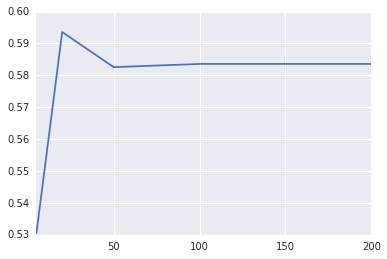

In [7]:
%matplotlib inline
results = []
max_depths = [5,20,50,100,200]
for max_depth in max_depths:
    Dtree = DecisionTreeClassifier(criterion='entropy',max_depth=max_depth)
    Dtree.fit(X_train, y_train)
    print(max_depth, "max_depth")
    score_train =  Dtree.score(X_train, y_train)
    score_test =  Dtree.score(X_test, y_test)
    print("score_test:", score_test)
    results.append(score_test)
print(" ")
pd.Series(results,max_depths).plot()

### Evaluation: test how maximum Depth of tree impacts performance. we used the basic decsion tree classifier(criterion ='entropy', max_depth=50) and plot the score_reuslts to max_depth. The results is shown as the following, we fould that 50 of max_depth will have the best outcome. 


/usr/lib64/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


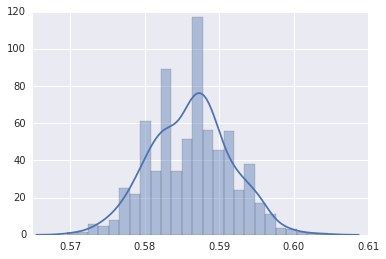

In [51]:
model_accuracies = []
for repetition in range(1000):
    X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.25, random_state=0)
    Dtree  = DecisionTreeClassifier(criterion='entropy')
    Dtree.fit(X_train, y_train)
    classifier_accuracy = Dtree.score(X_test, y_test)
    model_accuracies.append(classifier_accuracy)    
sb.distplot(model_accuracies)

### Run the model 1000 times, our model can get anywhere from 57% to 61% accurary.

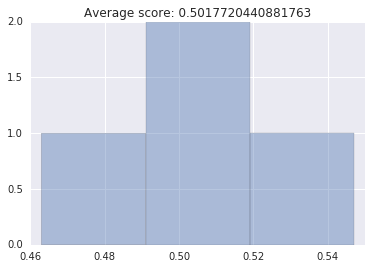

In [52]:
%matplotlib inline
from sklearn.cross_validation import cross_val_score
Dtree = DecisionTreeClassifier(criterion='entropy',max_depth=5)
# cross_val_score returns a list of the scores, which we can visualize
# to get a reasonable estimate of our classifier's performance
cv_scores = cross_val_score(Dtree, X, y, cv=4)
sb.distplot(cv_scores,kde=False)
plt.title('Average score: {}'.format(np.mean(cv_scores)))

As we know, models may classify the training set so well, but doesn't perform well on data set it hasn't seen before. we  used the sklearn pakage to do k-fold Cross-validation. we splited the origial data set into k subsets, use one of the subsets as the testing set, and the rest of the subsets are used as the training set. The process will repeat k times in which each subset is used as the testing set exactly once. we did 4-fold cross-validation and found the average score is a little bit less than previouly one. That indicates the model has overfitting phenomenen. 

In [56]:
from sklearn.cross_validation import StratifiedKFold
from sklearn.grid_search import GridSearchCV
Dtree = DecisionTreeClassifier()
parameter_grid = {'criterion': ['gini', 'entropy'],
                  'splitter': ['best', 'random'],
                  'max_depth': [1, 10, 20, 50],
                  'max_features': [1, 2, 4, 8]}

cross_validation = StratifiedKFold(y, n_folds=5)
grid_search = GridSearchCV(Dtree,
                           param_grid=parameter_grid,
                           cv=cross_validation)
grid_search.fit(X, y)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))
Dtree = grid_search.best_estimator_
Dtree

/usr/lib64/python3.4/site-packages/sklearn/cross_validation.py:532: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=5.
  % (min_labels, self.n_folds)), Warning)


Best score: 0.47921882824236356
Best parameters: {'max_features': 4, 'criterion': 'gini', 'max_depth': 10, 'splitter': 'random'}


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=4, max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='random')

Bassially, after we build and run the model, we need do performance tuning by choosing different parameters. The sklearn contain the GridSearhCV and StratifiedKFold packages to do parameter tuning, cross_validation and will give us the best settings for a handful of parameters.

In [13]:
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot_ng as pydot
# Create the classifier
dtree = DecisionTreeClassifier(criterion='entropy',max_depth=3)
dtree.fit(X_train,y_train)
dot_data = StringIO()  
export_graphviz(dtree,out_file=dot_data, feature_names=list(df.columns[:11]),filled=True,rounded=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue()) 
from IPython.display import HTML
HTML(str(graph.create_svg().decode('utf-8')))

In [17]:
graph.write_svg('mydt.svg')
graph.write_pdf('mydt.pdf')

True

We also re-used the code from homework 6 to print out the decision tree(level 4) and trace for each sample.

In [9]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
classifier = DecisionTreeClassifier(criterion='entropy',max_depth=50,
            max_features=4,
             min_samples_leaf=1)
y_pred = classifier.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          3       0.00      0.00      0.00         1
          4       0.11      0.11      0.11        27
          5       0.62      0.63      0.63       262
          6       0.66      0.62      0.64       464
          7       0.56      0.61      0.59       210
          8       0.41      0.37      0.39        35
          9       0.00      0.00      0.00         0

avg / total       0.60      0.60      0.60       999



/usr/lib64/python3.4/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


 we re-used the code from homework 6 to implemnet the decision tree model and print out the classification_report. As shown above, precision, recall and the F1 scores are used to evalutate the model. 

/usr/lib64/python3.4/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/lib64/python3.4/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/lib64/python3.4/site-packages/matplotlib/artist.py:224: MatplotlibDeprecationWarning: get_axes has been deprecated in mpl 1.5, please use the
axes property.  A removal date has not been set.
  stacklevel=1)


[0.0, 0.0, 0.0]
[0.19, 0.11, 0.14]
[0.61, 0.65, 0.62]
[0.67, 0.64, 0.65]
[0.58, 0.62, 0.6]
[0.38, 0.34, 0.36]
[0.0, 0.0, 0.0]
plotMat: [[0.0, 0.0, 0.0], [0.19, 0.11, 0.14], [0.61, 0.65, 0.62], [0.67, 0.64, 0.65], [0.58, 0.62, 0.6], [0.38, 0.34, 0.36], [0.0, 0.0, 0.0]]
support: [1, 27, 262, 464, 210, 35, 0]


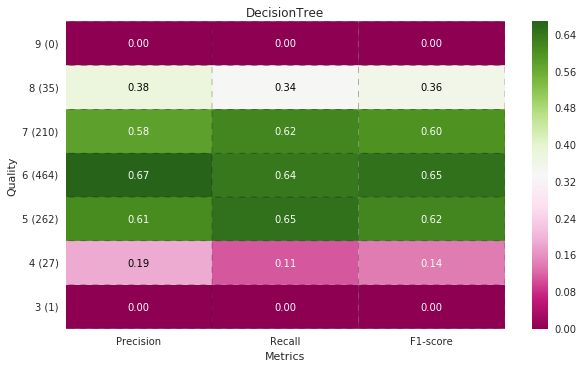

In [58]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np 
def show_values(pc, fmt="%.2f", **kw):
    '''
    Heatmap with text in each cell with matplotlib's pyplot
    Source: http://stackoverflow.com/a/25074150/395857 
    By HYRY
    '''
    pc.update_scalarmappable()
    ax = pc.get_axes()
    for p, color, value in zip(pc.get_paths(), pc.get_facecolors(), pc.get_array()):
        x, y = p.vertices[:-2, :].mean(0)
        if np.all(color[:3] > 0.5):
            color = (0.0, 0.0, 0.0)
        else:
            color = (1.0, 1.0, 1.0)
        ax.text(x, y, fmt % value, ha="center", va="center", color=color, **kw)
def cm2inch(*tupl):
    '''
    Specify figure size in centimeter in matplotlib
    Source: http://stackoverflow.com/a/22787457/395857
    By gns-ank
    '''
    inch = 2.54
    if type(tupl[0]) == tuple:
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)
def heatmap(AUC, title, xlabel, ylabel, xticklabels, yticklabels, figure_width=40, figure_height=20, correct_orientation=False, cmap='RdBu'):
    '''
    Inspired by:
    - http://stackoverflow.com/a/16124677/395857 
    - http://stackoverflow.com/a/25074150/395857
    '''
    # Plot it out
    fig, ax = plt.subplots()    
    #c = ax.pcolor(AUC, edgecolors='k', linestyle= 'dashed', linewidths=0.2, cmap='RdBu', vmin=0.0, vmax=1.0)
    c = ax.pcolor(AUC, edgecolors='k', linestyle= 'dashed', linewidths=0.2, cmap=cmap)
    # put the major ticks at the middle of each cell
    ax.set_yticks(np.arange(AUC.shape[0]) + 0.5, minor=False)
    ax.set_xticks(np.arange(AUC.shape[1]) + 0.5, minor=False)
    # set tick labels
    #ax.set_xticklabels(np.arange(1,AUC.shape[1]+1), minor=False)
    ax.set_xticklabels(xticklabels, minor=False)
    ax.set_yticklabels(yticklabels, minor=False)
    # set title and x/y labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)      

      # Remove last blank column
    plt.xlim( (0, AUC.shape[1]) )

    # Turn off all the ticks
    ax = plt.gca()    
    for t in ax.xaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False
    for t in ax.yaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False

    # Add color bar
    plt.colorbar(c)

    # Add text in each cell 
    show_values(c)

    # Proper orientation (origin at the top left instead of bottom left)
    if correct_orientation:
        ax.invert_yaxis()
        ax.xaxis.tick_top()       

    # resize 
    fig = plt.gcf()
    #fig.set_size_inches(cm2inch(40, 20))
    #fig.set_size_inches(cm2inch(40*4, 20*4))
    fig.set_size_inches(cm2inch(figure_width, figure_height))

def plot_classification_report(classification_report, title='DecisionTree', cmap='PiYG'):
    '''
    Plot scikit-learn classification report.
    Extension based on http://stackoverflow.com/a/31689645/395857 
    '''
    lines = classification_report.split('\n')

    classes = []
    plotMat = []
    support = []
    class_names = []
    for line in lines[2 : (len(lines) - 2)]:
        t = line.strip().split()
        if len(t) < 2: continue
        classes.append(t[0])
        v = [float(x) for x in t[1: len(t) - 1]]
        support.append(int(t[-1]))
        class_names.append(t[0])
        print(v)
        plotMat.append(v)

    print('plotMat: {0}'.format(plotMat))
    print('support: {0}'.format(support))

    xlabel = 'Metrics'
    ylabel = 'Quality'
    xticklabels = ['Precision', 'Recall', 'F1-score']
    yticklabels = ['{0} ({1})'.format(class_names[idx], sup) for idx, sup  in enumerate(support)]
    figure_width = 25
    figure_height = len(class_names) + 7
    correct_orientation = False
    heatmap(np.array(plotMat), title, xlabel, ylabel, xticklabels, yticklabels, figure_width, figure_height, correct_orientation, cmap=cmap)

def main():
    plot_classification_report(classification_report(y_test,y_pred))
    plt.savefig('test_plot_classif_report.png', dpi=200, format='png', bbox_inches='tight')
    plt.show()
if __name__ == "__main__":
    main()
    #cProfile.run('main()') # if you want to do some profiling

We used the code from the stackoverflow.com to draw the heapmap for classification_report. precision, recall and the F1 scores and quality with different levels were indicated. 

Confusion matrix, without normalization
[[  0   0   1   0   0   0   0]
 [  0   4  14   6   2   1   0]
 [  1  12 164  73   9   3   0]
 [  0   8  73 296  73  13   1]
 [  0   1  16  58 131   4   0]
 [  0   0   1  12  10  12   0]
 [  0   0   0   0   0   0   0]]


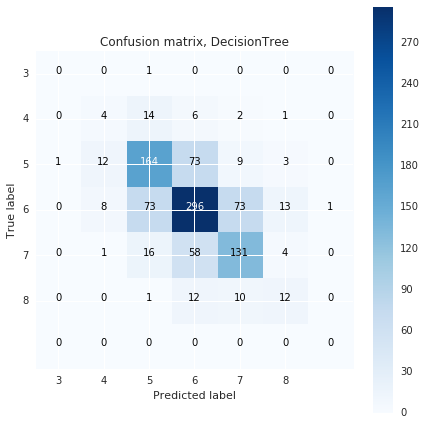

In [81]:
%matplotlib inline
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(6,6))
plot_confusion_matrix(cnf_matrix, classes=['3','4','5','6','7','8'],
                      title='Confusion matrix, DecisionTree')

# Plot normalized confusion matrix
#plt.figure(figsize=(10, 10))
#plot_confusion_matrix(cnf_matrix, classes=['3','4','5','6','7','8'], normalize=True,
                      #title='Normalized confusion matrix')

plt.show()


We re-used the code from homework 6 to plot and print out the confision matrix for decison tree classifiers.

# Random Forest 
Random forest classifier is an ensemble classifier that consists of many decision trees and outputs the class that is the mode of the class's output by individual trees. Random forest classifiers have the decision trees work together to make a more accurate classification. 
There are some parameters that we can tune for Random forest classifiers, but for now, we just use the basic Random forest classifiers(criterion ='entropy', n_estimators=30) and sklearn.cross_validation.train_test_split to split the data to training set and testing set. we use precision, recall and the F1 scores to evaluate each model. 

In [28]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=30,criterion='entropy')
rfc.fit(X_train,y_train)
score_train = rfc.score(X_train, y_train)
score_test = rfc.score(X_test, y_test)
print('Ratio of correctly classified samples for:\n\tTraining-set:\t%f\n\tTest-set:\t%f'%(score_train, score_test))

Ratio of correctly classified samples for:
	Training-set:	0.999666
	Test-set:	0.697698


In [31]:
rfc_pred = rfc.fit(X_train, y_train).predict(X_test)
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))

[[  0   0   0   1   0   0]
 [  0   2  18   7   0   0]
 [  0   2 188  70   2   0]
 [  0   0  68 364  32   0]
 [  0   1   4  80 125   0]
 [  0   0   1   8  16  10]]
             precision    recall  f1-score   support

          3       0.00      0.00      0.00         1
          4       0.40      0.07      0.12        27
          5       0.67      0.72      0.70       262
          6       0.69      0.78      0.73       464
          7       0.71      0.60      0.65       210
          8       1.00      0.29      0.44        35

avg / total       0.69      0.69      0.68       999



/usr/lib64/python3.4/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


we did run the Random Forest model and print out the classfication_report. The precsion, recall fl-score were shown in the above output.

30 n_estimator
score_test: 0.710710710711
50 n_estimator
score_test: 0.700700700701
100 n_estimator
score_test: 0.692692692693
200 n_estimator
score_test: 0.707707707708
500 n_estimator
score_test: 0.6996996997
1000 n_estimator
score_test: 0.702702702703
2000 n_estimator
score_test: 0.705705705706
 


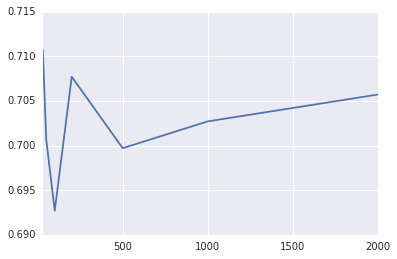

In [28]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.cross_validation import train_test_split
# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25)
results = []
n_estimator_options = [30,50,100,200,500,1000,2000]
for n_estimator in n_estimator_options:
    rfc=RandomForestClassifier(criterion='entropy',n_estimators=n_estimator)
    rfc.fit(X_train,y_train)
    print(n_estimator, "n_estimator")
    score_train = rfc.score(X_train, y_train)
    score_test = rfc.score(X_test, y_test)
    print("score_test:", score_test)
    results.append(score_test)
print(" ")
pd.Series(results,n_estimator_options).plot()


### Test how n_estimators of Random Forest classifiers impacts performance. we used the basic Random Forest classifiers(criterion ='entropy') and plot the score_reuslts to n_estimators. We fould that 30 of n_estimators will have the best outcome.

In [38]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.cross_validation import train_test_split
 
# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25)
results = []
max_features_options = ["auto",None,"sqrt","log2",0.9,0.2]
for max_features in max_features_options:
    rfc=RandomForestClassifier(criterion='entropy',n_estimators=30, max_features=max_features)
    rfc.fit(X_train,y_train)
    print(max_features, "max_features")
    score_train = rfc.score(X_train, y_train)
    score_test = rfc.score(X_test, y_test)
    print("score_test:", score_test)
    results.append(score_test)
print(" ")
pd.Series(results)


auto max_features
score_test: 0.676676676677
None max_features
score_test: 0.658658658659
sqrt max_features
score_test: 0.674674674675
log2 max_features
score_test: 0.674674674675
0.9 max_features
score_test: 0.653653653654
0.2 max_features
score_test: 0.682682682683
 


0    0.676677
1    0.658659
2    0.674675
3    0.674675
4    0.653654
5    0.682683
dtype: float64

### Optimize the parameter for max_features_options, we found when max_features_options is 0.2, the model will get the best performance. 

1 min_samples
score_test: 0.66966966967
2 min_samples
score_test: 0.668668668669
3 min_samples
score_test: 0.65965965966
4 min_samples
score_test: 0.653653653654
5 min_samples
score_test: 0.636636636637
6 min_samples
score_test: 0.652652652653
7 min_samples
score_test: 0.617617617618
8 min_samples
score_test: 0.61961961962
9 min_samples
score_test: 0.633633633634
10 min_samples
score_test: 0.613613613614
 


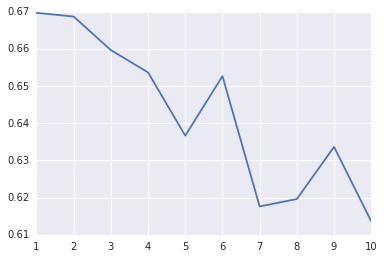

In [40]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.cross_validation import train_test_split
 
# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25)
results = []
min_samples_leaf_options=[1,2,3,4,5,6,7,8,9,10]
for min_samples in min_samples_leaf_options:
    rfc=RandomForestClassifier(criterion='entropy',n_estimators=30, max_features="auto", min_samples_leaf=min_samples)
    rfc.fit(X_train,y_train)
    print(min_samples, "min_samples")
    score_train = rfc.score(X_train, y_train)
    score_test = rfc.score(X_test, y_test)
    print("score_test:", score_test)
    results.append(score_test)
print(" ")
pd.Series(results,min_samples_leaf_options).plot()


### Optimize the parameter for min_samples_leaf, we found when min_samples_leaf is 1, the model will get the best performance. 

In [12]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.cross_validation import train_test_split
# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25)
rfc=RandomForestClassifier(criterion='entropy',n_estimators=30, max_features="auto", min_samples_leaf=1)
rfc.fit(X_train,y_train)
score_train = rfc.score(X_train, y_train)
score_test = rfc.score(X_test, y_test)
rfc_pred = rfc.fit(X_train, y_train).predict(X_test)
print("score_train:", score_train)
print("score_test:", score_test)

score_train: 0.999332220367
score_test: 0.681681681682


### Plug the optimized parameters in RandomForestClassifiers and implemented it. The finaltested score was shown as the above. 

/usr/lib64/python3.4/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/lib64/python3.4/site-packages/matplotlib/artist.py:224: MatplotlibDeprecationWarning: get_axes has been deprecated in mpl 1.5, please use the
axes property.  A removal date has not been set.
  stacklevel=1)


[0.0, 0.0, 0.0]
[0.64, 0.29, 0.4]
[0.68, 0.69, 0.69]
[0.68, 0.79, 0.73]
[0.71, 0.54, 0.61]
[0.88, 0.37, 0.52]
[0.0, 0.0, 0.0]
plotMat: [[0.0, 0.0, 0.0], [0.64, 0.29, 0.4], [0.68, 0.69, 0.69], [0.68, 0.79, 0.73], [0.71, 0.54, 0.61], [0.88, 0.37, 0.52], [0.0, 0.0, 0.0]]
support: [2, 24, 263, 483, 185, 41, 1]


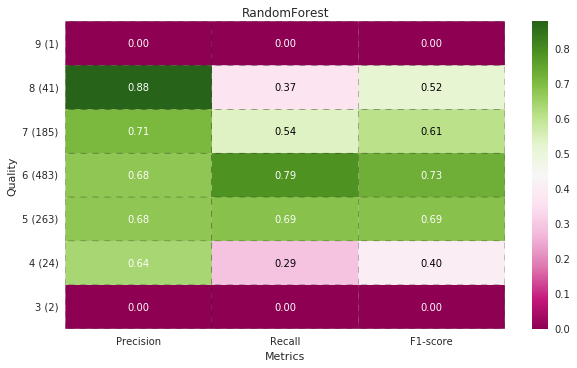

In [13]:
import matplotlib.pyplot as plt
import numpy as np 
def show_values(pc, fmt="%.2f", **kw):
    '''
    Heatmap with text in each cell with matplotlib's pyplot
    Source: http://stackoverflow.com/a/25074150/395857 
    By HYRY
    '''
    pc.update_scalarmappable()
    ax = pc.get_axes()
    for p, color, value in zip(pc.get_paths(), pc.get_facecolors(), pc.get_array()):
        x, y = p.vertices[:-2, :].mean(0)
        if np.all(color[:3] > 0.5):
            color = (0.0, 0.0, 0.0)
        else:
            color = (1.0, 1.0, 1.0)
        ax.text(x, y, fmt % value, ha="center", va="center", color=color, **kw)


def cm2inch(*tupl):
    '''
    Specify figure size in centimeter in matplotlib
    Source: http://stackoverflow.com/a/22787457/395857
    By gns-ank
    '''
    inch = 2.54
    if type(tupl[0]) == tuple:
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)


def heatmap(AUC, title, xlabel, ylabel, xticklabels, yticklabels, figure_width=40, figure_height=20, correct_orientation=False, cmap='RdBu'):
    '''
    Inspired by:
    - http://stackoverflow.com/a/16124677/395857 
    - http://stackoverflow.com/a/25074150/395857
    '''

    # Plot it out
    fig, ax = plt.subplots()    
    #c = ax.pcolor(AUC, edgecolors='k', linestyle= 'dashed', linewidths=0.2, cmap='RdBu', vmin=0.0, vmax=1.0)
    c = ax.pcolor(AUC, edgecolors='k', linestyle= 'dashed', linewidths=0.2, cmap=cmap)

    # put the major ticks at the middle of each cell
    ax.set_yticks(np.arange(AUC.shape[0]) + 0.5, minor=False)
    ax.set_xticks(np.arange(AUC.shape[1]) + 0.5, minor=False)

    # set tick labels
    #ax.set_xticklabels(np.arange(1,AUC.shape[1]+1), minor=False)
    ax.set_xticklabels(xticklabels, minor=False)
    ax.set_yticklabels(yticklabels, minor=False)

    # set title and x/y labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)      

    # Remove last blank column
    plt.xlim( (0, AUC.shape[1]) )

    # Turn off all the ticks
    ax = plt.gca()    
    for t in ax.xaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False
    for t in ax.yaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False

    # Add color bar
    plt.colorbar(c)

    # Add text in each cell 
    show_values(c)

    # Proper orientation (origin at the top left instead of bottom left)
    if correct_orientation:
        ax.invert_yaxis()
        ax.xaxis.tick_top()       

    # resize 
    fig = plt.gcf()
    #fig.set_size_inches(cm2inch(40, 20))
    #fig.set_size_inches(cm2inch(40*4, 20*4))
    fig.set_size_inches(cm2inch(figure_width, figure_height))



def plot_classification_report(classification_report, title='RandomForest', cmap='PiYG'):
    '''
    Plot scikit-learn classification report.
    Extension based on http://stackoverflow.com/a/31689645/395857 
    '''
    lines = classification_report.split('\n')

    classes = []
    plotMat = []
    support = []
    class_names = []
    for line in lines[2 : (len(lines) - 2)]:
        t = line.strip().split()
        if len(t) < 2: continue
        classes.append(t[0])
        v = [float(x) for x in t[1: len(t) - 1]]
        support.append(int(t[-1]))
        class_names.append(t[0])
        print(v)
        plotMat.append(v)

    print('plotMat: {0}'.format(plotMat))
    print('support: {0}'.format(support))

    xlabel = 'Metrics'
    ylabel = 'Quality'
    xticklabels = ['Precision', 'Recall', 'F1-score']
    yticklabels = ['{0} ({1})'.format(class_names[idx], sup) for idx, sup  in enumerate(support)]
    figure_width = 25
    figure_height = len(class_names) + 7
    correct_orientation = False
    heatmap(np.array(plotMat), title, xlabel, ylabel, xticklabels, yticklabels, figure_width, figure_height, correct_orientation, cmap=cmap)


def main():
    plot_classification_report(classification_report(y_test,rfc_pred))
    plt.savefig('test_plot_classif_report.png', dpi=200, format='png', bbox_inches='tight')
    plt.show()
if __name__ == "__main__":
    main()
    #cProfile.run('main()') # if you want to do some profiling

We used the codes from the stackoverflow.com to draw the heapmap for classification_report of random forest classificers. precision, recall, the F1 scores and quality with different levels are indicated.

Confusion matrix, without normalization
[[  0   0   1   1   0   0   0]
 [  1   2   5  11   4   1   0]
 [  0   6  69 118  64   6   0]
 [  2  16 125 215 109  15   1]
 [  0   3  55  73  46   8   0]
 [  0   0  10  22   7   2   0]
 [  0   0   0   1   0   0   0]]


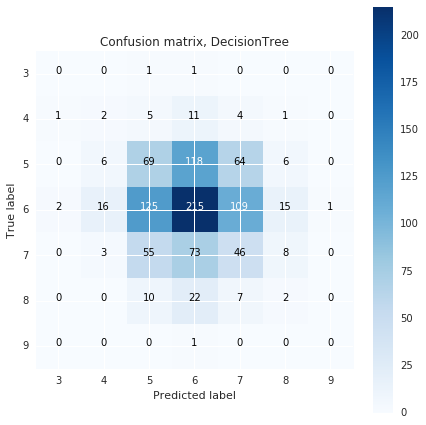

In [14]:
%matplotlib inline
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(6,6))
plot_confusion_matrix(cnf_matrix, classes=['3','4','5','6','7','8','9'],
                      title='Confusion matrix, DecisionTree')

# Plot normalized confusion matrix
#plt.figure(figsize=(10, 10))
#plot_confusion_matrix(cnf_matrix, classes=['3','4','5','6','7','8','9'], normalize=True,
                      #title='Normalized confusion matrix')

plt.show()


As we did on Decision tree classifiers, The confusion matrix for Random Forest classifiers also was created. The numbers in different quality levels were indicated. 

/usr/lib64/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


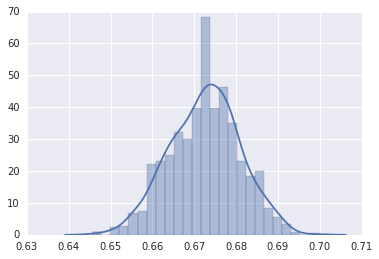

In [43]:
from sklearn.cross_validation import train_test_split
model_accuracies = []
for repetition in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
    rfc=RandomForestClassifier(criterion='entropy',n_estimators=30, max_features="auto", min_samples_leaf=1)
    rfc.fit(X_train,y_train)
    classifier_accuracy = rfc.score(X_test, y_test)
    model_accuracies.append(classifier_accuracy)    
sb.distplot(model_accuracies)

### Run the model 1000 times with the optimized parameters, our model can get anywhere from 64% to 70% accurary.

Feature ranking:
1. feature 3 (0.206633)
2. feature 0 (0.176727)
3. feature 2 (0.162279)
4. feature 4 (0.118745)
5. feature 1 (0.106261)
6. feature 8 (0.046988)
7. feature 6 (0.046404)
8. feature 7 (0.046142)
9. feature 9 (0.045775)
10. feature 5 (0.044046)


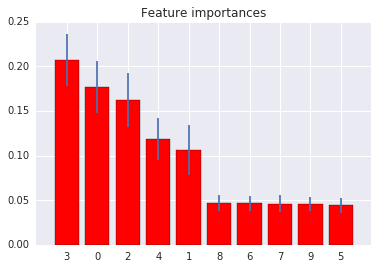

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
# Build a classification task using 3 informative features
X, y = make_classification(n_samples=2000,
                           n_features=10,
                           n_informative=5,
                           n_redundant=0,
                           n_repeated=0,
                           n_classes=2,
                           random_state=0,
                           shuffle=False)
# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)
forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
# Print the feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="R", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

### Use the random forests classifiers to evaluate the importance of features on an artificial classification task. The red bars are the feature importances of the forest, along with their inter-trees variability. As expected, the plot suggests that 5 features are informative, while the remaining are not.